<a href="https://colab.research.google.com/github/ridwansukri/cyclistic-bike-share-with-weather/blob/main/cyclistic_bike_share_analysis_with_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cyclistic Bike Share Analysis with Weather Integration

- Author: Muh Ridwan Sukri
- Last updated: August 14, 2023

## Introduction
This is a fictional case study as a capstone project of the Tetris Program Batch 3.
My main goal is to show both my technical skills in AWS, SQL, Python and Tableau as well as my data analyst approach to a case.
The whole process could have been done entirely in Python without SQL or another BI Tools.
In this case study, we will use PACE Framework: Prepare, Analyze, Construct, and Execute.

You can access my presentation [here](https://www.canva.com/design/DAFq4CjjTCw/yOjn2j3S4m5_Y7k0pJb0Ng/edit) and Tableau Dashboard [here](https://public.tableau.com/app/profile/ridwan.sukri/viz/CyclisticDailyDashboard/Dashboard1).

## Table of Contents
>[Plan](#scrollTo=e22fdf4c-2750-4b00-937c-0679abb7e717)

>>[Background](#scrollTo=a3e1c60e-61fd-4643-96f0-4c1a33393d56)

>>[Business Tasks](#scrollTo=821dae94-d9b2-4418-9f24-b67fe72c2a4d)

>>[Business Objectives](#scrollTo=d8287798-e468-4c75-873d-58fd23f7c364)

>>[Deliverables](#scrollTo=3ca3b4b3-4b73-462a-b2dc-d19ea0e9467d)

>>[Key stakeholders](#scrollTo=a98f8303-6dfa-45fb-a991-3a3a8572dedf)

>>[Question to Guide Analysis](#scrollTo=aVWdhH8QDuK-)

>>[Prepare](#scrollTo=eb6267f2-af4c-423e-ae4b-b71a2e733f33)

>>>[Information on Data Source](#scrollTo=1868e7df-457f-48eb-a866-c01e31eb62df)

>>>[Crebility of Data](#scrollTo=55d9733f-d270-4c79-ae0e-fcba7b0461f6)

>>>[Tools](#scrollTo=8c86d317-4b22-4e2b-8231-e35410406c19)

>>>[Diagram of Data Pipeline](#scrollTo=4e340b80-3d06-41d7-8076-f7867b42ab98)

>[Analyze](#scrollTo=bd62753a-a442-412a-aa34-4e138881af42)

>>[Preparing the Data](#scrollTo=oAiPZCt71JgI)

>>>[Install Unavailable Packages](#scrollTo=mChtcSsfzX6-)

>>>[Import Libraries](#scrollTo=9e5e8a85-24f3-4da5-8f46-7666c5d349ad)

>>>[Create AWS S3 Buckets](#scrollTo=gI8OmewbSC4a)

>>>[Invoke AWS Lambda Function](#scrollTo=NgED_a1JSHxz)

>>>[Put All Necessary Data to AWS S3](#scrollTo=eJ2J7QRCSTL8)

>>[Retrieve Bike Dataset](#scrollTo=3edc974e-1290-49cd-a26f-05ffae9c920d)

>>[Data Cleansing and Manipulation for Bike Dataset](#scrollTo=82494ccc-032b-41fb-8340-2b67fccaaea5)

>>>[Familiarize with Bike Data](#scrollTo=i_SKGF8S3Cji)

>>>[Replace all white space with NaN values](#scrollTo=tk1XvROR3QEb)

>>>[Drop null values in some columns](#scrollTo=hTwv9DfW3i6S)

>>>[Check Duplicate Row](#scrollTo=e9mwlwid3oaI)

>>>[Text Cleaning with Regex](#scrollTo=QH7m4U775RSA)

>>>[Combine Minority Group with Same Group](#scrollTo=0FQKq4cm5kzx)

>>>[Create New Features from Datetime Columns](#scrollTo=D2tjfea96V1P)

>>>[Drop Rows with same Latitude & Longitude](#scrollTo=vzKl1Qp_6qBq)

>>[Building Model to Predict Missing Station Name](#scrollTo=oCgiUB26Qk7D)

>>>[Preparing for Station Data](#scrollTo=1IJ6zwFd7AiA)

>>>[Separate Station Data to Training and Testing](#scrollTo=yqzu66hz7NFk)

>>>[Predict Missing Station Name With KNN and Evaluate](#scrollTo=90J3mStLR0LD)

>>>[Predict Missing Station Name with Decision Tree and Evaluate](#scrollTo=3yEiDqd6SE0l)

>>>[Evaluate Decision Tree with New Data Using Cross Validation](#scrollTo=ijqRF64mSURR)

>>>[Build Decision Tree Model to Predict Missing Station Name](#scrollTo=Wf1GFM7rS2Dr)

>>>[Impute Missing Station Data with Imputed Station Name](#scrollTo=VAHRVnDyF4zH)

>>>[Save Decision Tree Model](#scrollTo=qQvtGwC_GCfJ)

>>[Retrieve Weather Dataset](#scrollTo=1205877c-644d-427b-904c-12dbc71f13a3)

>>>[Familiarize with Weather Data](#scrollTo=5sTXistnGR4K)

>>>[Replace white spaces using Regex](#scrollTo=Cf5DubsAGxRf)

>>>[Drop columns](#scrollTo=QHzpd5Z_G4qA)

>>>[Impute Missing Value using Forward and Backward Filling](#scrollTo=573y3pI5G_k1)

>>>[Categorize Conditions Column](#scrollTo=c299ItZiHjUh)

>>[Merge Bike Data with Weather Data](#scrollTo=E7oNZqPZHxCr)

>>>[Drop Unnecessary Columns](#scrollTo=mqoO8tBNH4Ze)

>>>[Convert Category to Right Type](#scrollTo=T4_ZStP4IIO_)

>>>[Re-order Column Position](#scrollTo=Nc_0A5w5IXfp)

>>[Upload Cleaned Data to S3](#scrollTo=rF21zLobIc4a)

>>[Inital Exploratory Analysis](#scrollTo=aa5f6710-e159-40c8-a314-f910e9c27708)

>>>[Descriptive Statistics](#scrollTo=P10X3vo4RreF)

>>>[Perform Visualization to see Distributions and trends for Numerical Features](#scrollTo=HQRa6sUDR4i5)

>>>[Perform Visualization to see Distributions and trends for Categorical Features](#scrollTo=NmfiNCOVSVgp)

>>>[Outliers Analysis](#scrollTo=PN7AG7zWTWfs)

>>[Exploratory Data Analysis on Natural Factors](#scrollTo=a5a7adc5-d3ee-43eb-b465-f79c546888a0)

>>[Exploratory Data Analysis on Station Level](#scrollTo=dcTO3UgEUbEV)

>[Construct](#scrollTo=bPUhW2ZfxXz9)

>>[Create Duration Category](#scrollTo=lXwVxgLDZanJ)

>>[Label and One-Hot Encoding](#scrollTo=QpOMPdufoWyY)

>>[Feature Selection](#scrollTo=Qj8uEdvVtoLc)

>>>[Show Correlation Matrix](#scrollTo=0S6MoyEoogn4)

>>>[Backward Elimination](#scrollTo=kyaFE7_fpqpO)

>>>[Feature Importance](#scrollTo=tkT7_pIME8M8)

>>>[Validate Feature Importance](#scrollTo=pNHWZmCIuZrj)

>>[Train Classification Models](#scrollTo=1sHOuMQHyQyM)

>>[Hyperparameter Tuning](#scrollTo=zPFJvOVLIR_Z)

>>[Save Best Model](#scrollTo=y6CTBPnezdMg)

>[Execute](#scrollTo=ARqFDSv9dAZt)



# Plan

## Background
I am a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago that features more than 5,800 bicycles and 600 docking stations. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, my team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, my team will design a new marketing strategy to convert casual riders into annual members and keeps Member renew his Membership. But first, Cyclistic executives must approve my recommendations, so they must be backed up with compelling data insights and professional data visualizations.

## Business Tasks
1. Analyze Cyclistic historical bike trip data to identify trends and get some insights.
2. Customer Segmentation and Weather Analysis: Understand how different types of customers (members and casual users) use the bike sharing service under different weather conditions.
3. Trip Duration Analysis: Analyze the duration of trips and how it is affected by weather conditions.
4. Provide recommendations for marketing analyst team.

## Business Objectives
1. Improve Customer Engagement: By understanding how customers use the service under different weather conditions, we can provide more personalized recommendations and services.
2. Optimize Operational Efficiency: By predicting demand and understanding station usage patterns, we can better allocate our resources and manage bike stocks.
3. Increase Revenue: By understanding and predicting usage patterns, we can create pricing strategies and promotional offers to increase usage and revenue.

## Deliverables
1. ETL Process Documentation: Detailed scripts and documentation of the ETL process, which involves downloading and extracting data from a zip file on a server, storing it in an AWS S3 bucket, and creating a database in Redshift.
2. Data Cleaning and Preprocessing Scripts: Scripts to clean and preprocess the bike sharing and weather data within a DataSpell notebook.
3. Exploratory Data Analysis (EDA) Report: A comprehensive EDA report with visualizations explaining the usage patterns of different customers, trip durations under different weather conditions.
4. A model to predict missing station names using features such as location coordinates and other station attributes
5. A model to predict whether a given ride belongs to a Casual or Member customer type
6. Final Report and Presentation: A final report detailing the findings from the analysis and the performance of the predictive model, along with a presentation for key stakeholders.

## Key stakeholders

- Lily Moreno: The director of marketing and your manager.
- Cyclistic marketing analytics team: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy.
- Cyclistic executive team: The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.


## Question to Guide Analysis
1. What are the differences in bike usage behavior between Casual and Member users?
2. How can you apply these trends to Cyclistic customers?
3. How can these trends help influence Cyclistic marketing analytics team?

## Prepare

In the Prepare phase, we identify the data being used and its limitations.

### Information on Data Source
1. Cylistic dataset has been made available by Lyft Bikes and Scooters, LLC under this __[license](https://ride.divvybikes.com/data-license-agreement)__ and can be public accessed __[here](https://divvy-tripdata.s3.amazonaws.com/index.html)__
2. We are using another dataset to get hourly average of Temperature, Precipitation, Relative Humidity, Wind Speed, and many variables from [Visual Crossing](https://www.visualcrossing.com/weather-data).


### Crebility of Data
The dataset for this analysis adheres to the principles of the ROCCC system:
- **Reliability**: The dataset is reliable due to its large sample size, which closely mirrors the population size.
- **Originality**: The main dataset is original, sourced directly from Lyft Bikes and Scooters, LLC. But for weather dataset, we use third-party data from VisualCrossing.
- **Comprehensiveness**: The dataset does not contain personal information about participants, such as gender, age, or health status, to ensure privacy. This lack of demographic data could potentially introduce bias, as the dataset may not be randomized. However, we understand that this is a necessary precaution for public datasets, where personal information must be protected. Each ride is identified by an anonymous ride_id.
- **Current**: We use data in range of 2022, which means it is currently outdated and may not represent the current rends in smart device usage.
- **Cited**: The source of the data is cited and has been vetted, ensuring its legitimacy and credibility.

### Tools
For this project, we are leveraging a suite of tools to facilitate our data processing, analysis, and visualization tasks:

1. **Amazon Web Services (AWS)**: We utilize various AWS tools for our Extract, Transform, Load (ETL) processes. This involves extracting data from a server, loading it into an AWS S3 bucket for storage, and leveraging Redshift to manage the database.
2. **Python**: We employ Python, a powerful programming language, for multiple stages of our project. This includes data cleaning, where we prepare and sanitize our data for analysis, and exploratory data analysis (EDA), where we examine our data to uncover trends and insights. Python's extensive library support and data handling capabilities make it an ideal choice for these tasks.
3. **Tableau**: To effectively communicate our findings, we use Tableau for data visualization. This tool allows us to create interactive dashboards that clearly present our insights and facilitate a deeper understanding of the data among stakeholders.

### Diagram of Data Pipeline
![Diagram of Data Processing](https://ia902608.us.archive.org/26/items/diagram-etl_202306/diagram-etl.png)


# Analyze
In this Analyze stage, we prepare the data, sourced from Divvy's S3 Bucket and VisualCrossing for weather data, cleaned, merged, and conducted an Exploratory Data Analysis (EDA) to obtain insights that we will later report to the Director.

## Preparing the Data

### Install Unavailable Packages

In this cell, we're going to install packages that are not available in Google Colab Pro.

In [ ]:
# Install multiple packages using pip that not available in Google Colab
!pip install boto3 redshift-connector awscli catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 113.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 12.9 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9


We have now successfully installed the `boto3` package. This will allow us to interact with AWS services using Python.

### Import Libraries
In this cell, we're importing all the necessary Python libraries that we will use throughout this notebook:

- `urllib.request`, `sys`, `csv`, `codecs`, and `json` are standard Python libraries used for various purposes such as handling URLs, interacting with the system, working with CSV files, and handling JSON data respectively.
- `pandas` and `numpy` are fundamental packages for data analysis and manipulation.
- `re` is a package used for regular expression operations.
- `dump` is a package to save machine learning model
- `matplotlib.pyplot`, `plotly`, and `seaborn` are used for data visualization.
- `statsmodels.api` provides classes and functions for the estimation of different models.
- `sklearn` contains a lot of efficient tools for machine learning and statistical modeling.
  
These libraries provide the functionality we need to import and manipulate data, visualize our findings, and run machine learning algorithms.

Let's start by loading the required packages for this analysis

In [ ]:
# Import the necessary libraries
import boto3
import urllib.request
import sys
import os
import csv
import codecs
import redshift_connector
import json
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import statsmodels.api as sm
from joblib import dump
from plotly.subplots import make_subplots
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

We've now imported all the libraries that we'll be using in this notebook. These libraries will help us load and manipulate data, create visualizations, and build machine learning models.

### Create AWS S3 Buckets

The project utilizes two primary sources of data. The first is sourced from the Divvy-tripdata S3 Bucket. This data is automatically downloaded by an AWS Lambda function and stored in my personal S3 Bucket. From there, the data is transferred to AWS Redshift, where further data cleaning processes are performed using a Python Notebook.

In this cell, we're setting up AWS S3 buckets for storing our data.
  
This setup is necessary for us to store and retrieve data during our analysis.


In [ ]:
# Create an S3 client
s3 = boto3.client('s3')

# Specify the bucket names
bucket_name_1 = "cyclistic-extraction-bucket"
bucket_name_2 = "visualcrossing-extraction-bucket"
bucket_name_3 = "cyclistic-cleaned-bucket"

# Specify the region where to create the buckets
region = 'ap-southeast-1'

In [ ]:
# Get a list of all bucket names
buckets = s3.list_buckets()
bucket_names = [bucket['Name'] for bucket in buckets['Buckets']]

# Check if bucket_name_1 already exists
if bucket_name_1 in bucket_names:
    print(f'Bucket {bucket_name_1} already exists.')
else:
    s3.create_bucket(
        Bucket=bucket_name_1,
        CreateBucketConfiguration={'LocationConstraint': region}
    )
    print(f'Bucket {bucket_name_1} created.')

# Check if bucket_name_2 already exists
if bucket_name_2 in bucket_names:
    print(f'Bucket {bucket_name_2} already exists.')
else:
    s3.create_bucket(
        Bucket=bucket_name_2,
        CreateBucketConfiguration={'LocationConstraint': region}
    )
    print(f'Bucket {bucket_name_2} created.')

# Check if bucket_name_3 already exists
if bucket_name_3 in bucket_names:
    print(f'Bucket {bucket_name_3} already exists.')
else:
    s3.create_bucket(
        Bucket=bucket_name_3,
        CreateBucketConfiguration={'LocationConstraint': region}
    )
    print(f'Bucket {bucket_name_3} created.')

Bucket cyclistic-extraction-bucket already exists.
Bucket visualcrossing-extraction-bucket already exists.
Bucket cyclistic-cleaned-bucket already exists.


We've now created two new S3 buckets, or confirmed that they already exist. We'll be using these buckets to store and retrieve data as we proceed with our analysis.


### Invoke AWS Lambda Function

In this cell, we're invoking an AWS Lambda function:

This AWS Lambda function is likely responsible for downloading and extracting the data we need for our analysis.

In [ ]:
# Create a low-level, service-oriented client by the service name ('lambda')
lambda_client = boto3.client('lambda', region_name='ap-southeast-1')

# The name of your AWS Lambda function
function_name = 'FunctionDownloadExtract'

try:
    # You can adjust the invocation type to 'Event' if you don't want to wait for the function to finish executing
    response = lambda_client.invoke(FunctionName=function_name, InvocationType='Event')

    # If the status code is 202, the function has started executing successfully
    if response['StatusCode'] == 202:
        print("The Lambda function has been invoked successfully.")
    else:
        print(f'An error occurred while executing the Lambda function: {response}')
except Exception as e:
    print(f'An error occurred: {str(e)}')

The Lambda function has been invoked successfully.


We've now invoked the AWS Lambda function. If it was invoked successfully, it should be running in the background, downloading and extracting the data we need for our analysis.


### Put All Necessary Data to AWS S3

In this cell, we're connecting to an AWS S3 bucket and listing all the files in it. This gives us an overview of the data files we have available in our S3 bucket for our analysis.


In [ ]:
# Establish a connection to S3
s3 = boto3.resource('s3')

# Name of the bucket
bucket_name_1 = 'cyclistic-extraction-bucket'

# Get the bucket
bucket = s3.Bucket(bucket_name_1)

# Print all file names in the bucket
for obj in bucket.objects.all():
    print(obj.key)

202201-divvy-tripdata.csv
202202-divvy-tripdata.csv
202203-divvy-tripdata.csv
202204-divvy-tripdata.csv
202205-divvy-tripdata.csv
202206-divvy-tripdata.csv
202207-divvy-tripdata.csv
202208-divvy-tripdata.csv
202209-divvy-tripdata.csv
202210-divvy-tripdata.csv
202211-divvy-tripdata.csv
202212-divvy-tripdata.csv
urls.txt


In this cell, we're fetching weather data from an API and saving it to our S3 bucket.

This cell is responsible for fetching and saving the weather data that we'll be integrating into our analysis.


In [ ]:
try:
    # Load the API key from the JSON file
    with open(r'weather_api.json', 'r') as f:
        config = json.load(f)

    api_key = config['VISUALCROSSING_API_KEY']

    url = f"https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/Chicago%2CUnited%20States/2021-12-31/2023-01-01?unitGroup=metric&include=hours&key={api_key}&contentType=csv"
    ResultBytes = urllib.request.urlopen(url)

    # Parse the results as CSV
    CSVText = csv.reader(codecs.iterdecode(ResultBytes, 'utf-8'))

    # Write the CSV data to a temporary local file
    with open('temp.csv', 'w', newline='') as f:
        writer = csv.writer(f)
        for row in CSVText:
            writer.writerow(row)

except urllib.error.HTTPError as e:
    ErrorInfo = e.read().decode()
    print('HTTP Error: ', e.code, ErrorInfo)
    sys.exit()
except urllib.error.URLError as e:
    print('URL Error: ', e.reason)
    sys.exit()
except Exception as e:
    print(f'An error occurred: {str(e)}')
    sys.exit()

try:
    # Create a session using your AWS credentials
    s3 = boto3.client('s3')

    bucket_name = 'visualcrossing-extraction-bucket'
    file_name = 'temp.csv'  # The name of the local file
    key_name = 'weather-data.csv'  # The name you want the file to have in S3

    # Upload the file to S3
    s3.upload_file(file_name, bucket_name, key_name)

    print("File uploaded successfully")
except Exception as e:
    print(f'An error occurred while uploading the file to S3: {str(e)}')

File uploaded successfully


In [ ]:
# Establish a connection to S3
s3 = boto3.resource('s3')

# Name of the bucket
bucket_name_2 = 'visualcrossing-extraction-bucket'

# Get the bucket
bucket = s3.Bucket(bucket_name_2)

# Print all file names in the weather bucket
for obj in bucket.objects.all():
    print(obj.key)

weather-data.csv



We've now connected to our S3 bucket and listed all the files in it. These files will be our data sources for the analysis. Let's move on to loading and exploring this data.

## Retrieve Bike Dataset
We're defining a function to get data from an AWS Redshift database.

In [ ]:
def get_data_from_database(creds_key, table_name):
    """
    Retrieves data from a specific table in an AWS Redshift database and returns it as a Pandas DataFrame.
    """
    # Load credentials from json
    with open("/content/drive/MyDrive/Colab Notebooks/redshift_credentials.json") as f:
        creds = json.load(f)

    # Connect to the cluster
    conn = redshift_connector.connect(
        host=creds['REDSHIFT_HOST'],
        database=creds[creds_key],
        port=int(creds['REDSHIFT_PORT']),  # convert port to integer
        user=creds['REDSHIFT_USERNAME'],
        password=creds['REDSHIFT_PASSWORD']
    )

    # Create a Cursor object
    cursor = conn.cursor()

    # Query the table using the Cursor
    cursor.execute(f"SELECT * FROM {table_name}")

    # Retrieve the query result set
    result = cursor.fetchall()

    # Convert result into DataFrame
    df = pd.DataFrame(result, columns=[desc[0] for desc in cursor.description])

    # Return the dataframe
    return df

 After that, we're calling the function we defined in the previous cell to fetch the cyclistic trip data from our Redshift database. We store the resulting DataFrame in the variable `df`.


In [ ]:
# Call function to get cyclistic data
df = get_data_from_database('REDSHIFT_CYCLISTIC', "public.cyclistic_tripdata")

Don't forget to create checkpoint if we broke the dataframe and don't need to get the data again from Redshift.

## Data Cleansing and Manipulation for Bike Dataset
There are some steps to do Data Cleansing and Manipulation

- Observe and familiarize with data;
- Check for null or missing values;
- Perform sanity check of data

### Familiarize with Bike Data

Using head function to show first 10 rows and familiarise with the data. We create copy of dataframe as a checkpoint so if there is a wrong step that changes the dataframe to be unwanted, we don't need to run the syntax from the beginning, just run it from the checkpoint.

In [ ]:
# Create copy of df as bike_df
bike_df = df.copy()

In [ ]:
# Check first 10 rows of bike_df
bike_df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9834E8719EEDD9E2,classic_bike,2022-08-11 15:09:50,2022-08-11 15:26:28,Millennium Park,13008,Shedd Aquarium,15544,41.881032,-87.624084,41.867226,-87.615355,casual
1,9C14613D516C8CDB,electric_bike,2022-08-26 08:26:12,2022-08-26 08:35:04,Pine Grove Ave & Waveland Ave,TA1307000150,Sheffield Ave & Wrightwood Ave,TA1309000023,41.949559,-87.646067,41.928712,-87.653833,member
2,AE9E6911606AECAF,classic_bike,2022-08-16 23:24:41,2022-08-16 23:30:06,Lincoln Ave & Diversey Pkwy,TA1307000064,Sheffield Ave & Wrightwood Ave,TA1309000023,41.932225,-87.658617,41.928712,-87.653833,member
3,B7255AAB1696D59D,classic_bike,2022-08-24 20:36:23,2022-08-24 20:50:23,Millennium Park,13008,Shedd Aquarium,15544,41.881032,-87.624084,41.867226,-87.615355,member
4,56C76477A45F836F,docked_bike,2022-08-23 13:06:48,2022-08-23 13:23:57,Millennium Park,13008,Shedd Aquarium,15544,41.881032,-87.624084,41.867226,-87.615355,casual
5,A250250B2B8F2CB0,electric_bike,2022-08-08 17:13:44,2022-08-08 17:20:21,Calumet Ave & 51st St,813,Blackstone Ave & Hyde Park Blvd,13398,41.800000,-87.620000,41.802562,-87.590368,member
6,756CD2DA473A8970,classic_bike,2022-08-30 18:37:43,2022-08-30 18:46:40,Clark St & Chicago Ave,13303,Sedgwick St & Schiller St,TA1307000143,41.896750,-87.630890,41.907626,-87.638566,member
7,242BD6153DB5E18D,electric_bike,2022-08-31 14:12:40,2022-08-31 14:24:10,Millennium Park,13008,Shedd Aquarium,15544,41.881074,-87.624073,41.867226,-87.615355,casual
8,1A49F658E739EA77,classic_bike,2022-08-13 09:19:40,2022-08-13 09:35:45,Millennium Park,13008,Shedd Aquarium,15544,41.881032,-87.624084,41.867226,-87.615355,casual
9,14AB3C4081360974,electric_bike,2022-08-13 12:52:20,2022-08-13 13:10:48,Millennium Park,13008,Shedd Aquarium,15544,41.881397,-87.624131,41.867226,-87.615355,casual


In this cell, we're printing the data types of all columns in `bike_df`. This helps us understand what type of data each column contains, and whether we might need to convert any columns to different data types.


In [ ]:
# Checking all column types
print(bike_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 562.1+ MB
None


In [ ]:
# Check total rows and columns
bike_df.shape

(5667717, 13)

There are several column types that need to be changed.
Lily Moreno asked to retrieve data in 2022. We will check the dataset.

In [ ]:
# Check time ranges of bike_df
date_min_max = bike_df['started_at'].agg(['min', 'max'])
print(date_min_max)

min   2022-01-01 00:00:05
max   2022-12-31 23:59:26
Name: started_at, dtype: datetime64[ns]


We've now seen the data types, number of all rows and columns, and data range in `bike_df`. This information will be useful as we proceed with our data cleaning and analysis.

### Replace all white space with NaN values

In this cell, we're replacing all white spaces in `bike_df` with NaN values. This is a data cleaning step that can help us handle missing data more effectively in subsequent analyses.

In [ ]:
# Replace white spaces with null
bike_df = bike_df.replace('', np.nan)

In [ ]:
# Check percentage of null values
print(bike_df.isnull().mean() * 100)

ride_id                0.000000
rideable_type          0.000000
started_at             0.000000
ended_at               0.000000
start_station_name    14.698405
start_station_id      14.698405
end_station_name      15.751351
end_station_id        15.751351
start_lat              0.000000
start_lng              0.000000
end_lat                0.103357
end_lng                0.103357
member_casual          0.000000
dtype: float64


We've now seen the percentage of missing values in each column of `bike_df`. This gives us a better understanding of the quality of our data and the extent of missing values that we need to address.

### Drop null values in some columns

In this cell, we're dropping rows in `bike_df` that have missing values in the 'end_lat' and 'end_lng' columns. These columns represent the latitude and longitude of the end location of each bike ride, and without this data, these rows might represent invalid trip.


In [ ]:
# Drop null values in end_lat and end_lng columns
bike_df = bike_df.dropna(subset=['end_lat', 'end_lng'])

# Check percentage of null values
print(bike_df.isnull().mean() * 100)

ride_id                0.000000
rideable_type          0.000000
started_at             0.000000
ended_at               0.000000
start_station_name    14.713613
start_station_id      14.713613
end_station_name      15.664184
end_station_id        15.664184
start_lat              0.000000
start_lng              0.000000
end_lat                0.000000
end_lng                0.000000
member_casual          0.000000
dtype: float64


We've now dropped rows with missing values in the 'end_lat' and 'end_lng' columns. This is part of our data cleaning process to ensure that we're working with a complete dataset.


In this cell, we're checking for duplicate rows in `bike_df`. We consider rows to be duplicates if they have the same 'ride_id'. This is important as duplicate rows can skew our analysis.


### Check Duplicate Row

In [ ]:
# Get duplicate rows
duplicates = bike_df.duplicated(subset=['ride_id'])
bike_df[duplicates]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


There are no duplicate rows in our dataset. Next, we're cleaning up the 'rideable_type' column in bike_df:

- We replace underscores with spaces.
- We convert the text to title case.

These changes make the data in this column more readable and consistent.


### Text Cleaning with Regex

In [ ]:
# Change value in rideadble_type to sentence word
bike_df['rideable_type'] = bike_df['rideable_type'].replace('_', ' ', regex=True).str.title()
bike_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9834E8719EEDD9E2,Classic Bike,2022-08-11 15:09:50,2022-08-11 15:26:28,Millennium Park,13008,Shedd Aquarium,15544,41.881032,-87.624084,41.867226,-87.615355,casual
1,9C14613D516C8CDB,Electric Bike,2022-08-26 08:26:12,2022-08-26 08:35:04,Pine Grove Ave & Waveland Ave,TA1307000150,Sheffield Ave & Wrightwood Ave,TA1309000023,41.949559,-87.646067,41.928712,-87.653833,member
2,AE9E6911606AECAF,Classic Bike,2022-08-16 23:24:41,2022-08-16 23:30:06,Lincoln Ave & Diversey Pkwy,TA1307000064,Sheffield Ave & Wrightwood Ave,TA1309000023,41.932225,-87.658617,41.928712,-87.653833,member
3,B7255AAB1696D59D,Classic Bike,2022-08-24 20:36:23,2022-08-24 20:50:23,Millennium Park,13008,Shedd Aquarium,15544,41.881032,-87.624084,41.867226,-87.615355,member
4,56C76477A45F836F,Docked Bike,2022-08-23 13:06:48,2022-08-23 13:23:57,Millennium Park,13008,Shedd Aquarium,15544,41.881032,-87.624084,41.867226,-87.615355,casual


In these cell, we're cleaning up the 'start_station_name' and 'end_station_name' columns in `bike_df`:

This makes the station names cleaner and more consistent, and removes rows that likely represent charging stations, test rides, or bikes under repair, which are not relevant for our analysis.


In [ ]:
# Remove rows that contain 'chargingstx', 'TEST', and Repair
bike_df = bike_df[~bike_df['start_station_id'].str.contains('chargingstx|TEST|Repair', na=False)]
bike_df = bike_df[~bike_df['end_station_id'].str.contains('chargingstx|TEST|Repair', na=False)]

In [ ]:
def clean_station_name(name):
    """
    Cleans the station name by removing any text inside parentheses and asterisks.
    """

    if isinstance(name, str):  # Check if the input is a string
        name = re.sub('\s\([^)]*\)', '', name)  # Removes ' ()' and any characters inside the parentheses
        name = re.sub('\*', '', name)  # Removes '*' character
    return name

In [ ]:
# Apply the function to the 'start_station_name' and 'end_station_name' columns
bike_df['start_station_name'] = bike_df['start_station_name'].apply(clean_station_name)
bike_df['end_station_name'] = bike_df['end_station_name'].apply(clean_station_name)


In this cell, we're cleaning up the 'customer_type' column in `bike_df`:

- We first rename the 'member_casual' column to 'customer_type' to make it more descriptive.
- We then capitalize the first letter of each word in the 'customer_type' column.

This makes the customer type data more readable and consistent.

In [ ]:
# Change the column name
bike_df = bike_df.rename(columns={'member_casual': 'customer_type'})

# Capitalize the first letter of each word
bike_df['customer_type'] = bike_df['customer_type'].str.capitalize()

#Check first 10 rows of bike_df
bike_df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,customer_type
0,9834E8719EEDD9E2,Classic Bike,2022-08-11 15:09:50,2022-08-11 15:26:28,Millennium Park,13008,Shedd Aquarium,15544,41.881032,-87.624084,41.867226,-87.615355,Casual
1,9C14613D516C8CDB,Electric Bike,2022-08-26 08:26:12,2022-08-26 08:35:04,Pine Grove Ave & Waveland Ave,TA1307000150,Sheffield Ave & Wrightwood Ave,TA1309000023,41.949559,-87.646067,41.928712,-87.653833,Member
2,AE9E6911606AECAF,Classic Bike,2022-08-16 23:24:41,2022-08-16 23:30:06,Lincoln Ave & Diversey Pkwy,TA1307000064,Sheffield Ave & Wrightwood Ave,TA1309000023,41.932225,-87.658617,41.928712,-87.653833,Member
3,B7255AAB1696D59D,Classic Bike,2022-08-24 20:36:23,2022-08-24 20:50:23,Millennium Park,13008,Shedd Aquarium,15544,41.881032,-87.624084,41.867226,-87.615355,Member
4,56C76477A45F836F,Docked Bike,2022-08-23 13:06:48,2022-08-23 13:23:57,Millennium Park,13008,Shedd Aquarium,15544,41.881032,-87.624084,41.867226,-87.615355,Casual
5,A250250B2B8F2CB0,Electric Bike,2022-08-08 17:13:44,2022-08-08 17:20:21,Calumet Ave & 51st St,813,Blackstone Ave & Hyde Park Blvd,13398,41.800000,-87.620000,41.802562,-87.590368,Member
6,756CD2DA473A8970,Classic Bike,2022-08-30 18:37:43,2022-08-30 18:46:40,Clark St & Chicago Ave,13303,Sedgwick St & Schiller St,TA1307000143,41.896750,-87.630890,41.907626,-87.638566,Member
7,242BD6153DB5E18D,Electric Bike,2022-08-31 14:12:40,2022-08-31 14:24:10,Millennium Park,13008,Shedd Aquarium,15544,41.881074,-87.624073,41.867226,-87.615355,Casual
8,1A49F658E739EA77,Classic Bike,2022-08-13 09:19:40,2022-08-13 09:35:45,Millennium Park,13008,Shedd Aquarium,15544,41.881032,-87.624084,41.867226,-87.615355,Casual
9,14AB3C4081360974,Electric Bike,2022-08-13 12:52:20,2022-08-13 13:10:48,Millennium Park,13008,Shedd Aquarium,15544,41.881397,-87.624131,41.867226,-87.615355,Casual


We've now cleaned up the 'customer_type' column in bike_df. Next, we will check the proportion of rideable_type.

### Combine Minority Group with Same Group

In [ ]:
# Calculate the proportion of each unique value in the 'rideable_type' column
rideable_type_proportions = bike_df['rideable_type'].value_counts(normalize=True) * 100

# Print the result
print(rideable_type_proportions)

Electric Bike    51.171985
Classic Bike     45.708229
Docked Bike       3.119786
Name: rideable_type, dtype: float64


It appears that Docked Bike only accounts for 3% of the total data. After reading the documentation from Divvy, Docked Bike is classified as a classic bike, but it doesn't require a typical dock to lock because this type of bike is difficult to move without unlocking it first using the app. Therefore, we will classify it together with Classic Bike."

In [ ]:
# Combine 'Classic Bike' and 'Docked Bike' into a single category
bike_df['rideable_type'] = bike_df['rideable_type'].replace({'Docked Bike': 'Classic Bike'})

# Check the new proportions
new_rideable_type_proportions = bike_df['rideable_type'].value_counts(normalize=True) * 100

# Print the result
print(new_rideable_type_proportions)

Electric Bike    51.171985
Classic Bike     48.828015
Name: rideable_type, dtype: float64


### Create New Features from Datetime Columns

In this cell, we're changing the data types of the 'started_at' and 'ended_at' columns to datetime. This will allow us to perform datetime-specific operations on these columns, such as extracting the year, month, day, and hour.


In [ ]:
# Change data types of started_at and ended_at
bike_df['started_at'] = pd.to_datetime(bike_df['started_at'])
bike_df['ended_at'] = pd.to_datetime(bike_df['ended_at'])

In [ ]:
# Specify the time attributes that we want to extract from 'started_at'
time_attributes = ['year', 'month', 'date', 'day', 'hour']

# Loop over each attribute
for attr in time_attributes:
    # If the current attribute is 'month', convert the numeric month to its full name
    if attr == 'month':
        bike_df[attr] = bike_df['started_at'].dt.strftime('%B')  # '%B' is the strftime code for full month name
    # If the current attribute is 'date', extract only the day part of the datetime
    elif attr == 'date':
        bike_df[attr] = bike_df['started_at'].dt.day  # 'dt.day' returns the day part of the datetime
    # If the current attribute is 'day', convert the numeric day to its name
    elif attr == 'day':
        bike_df[attr] = bike_df['started_at'].dt.day_name()  # 'day_name()' returns the name of the day
    # For other attributes ('year', 'hour'), extract them as they are
    else:
        bike_df[attr] = getattr(bike_df['started_at'].dt, attr)  # 'getattr()' gets the attribute value from the date

Then, we're creating a 'season' column that maps each date to one of the four seasons (Spring, Summer, Fall, Winter). This is done based on the month and day of the 'started_at' column. The seasons are then represented as cyclical data, which is more representative of the true nature of seasons. This 'season' column will allow us to analyze our data based on seasons, which could provide interesting insights given the likely impact of weather on bike rides.


In [ ]:
# Create 'date_offset' column that maps each date to a number in a cyclical range that corresponds to the typical duration of the seasons
bike_df['date_offset'] = (bike_df['started_at'].dt.month*100 + bike_df['started_at'].dt.day - 320)%1300

# Categorize 'date_offset' into four bins corresponding to the seasons, and create a new column 'season' with these labels
bike_df['season'] = pd.cut(bike_df['date_offset'], [0, 300, 602, 900, 1300], labels=['Spring', 'Summer', 'Fall', 'Winter'])

# Drop the 'date_offset' column from the DataFrame in-place
bike_df.drop(columns='date_offset', inplace=True)

# Check 10 rows of sample bike_df
bike_df.sample(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,customer_type,year,month,date,day,hour,season
703641,B3C4F2C73F158B99,Electric Bike,2022-08-10 12:52:43,2022-08-10 12:59:38,Halsted St & Roosevelt Rd,TA1305000017,NaN,NaN,41.867409,-87.648663,41.870000,-87.660000,Member,2022,August,10,Wednesday,12,Summer
62437,EA7D0B88A475B236,Electric Bike,2022-09-14 21:49:08,2022-09-14 22:08:16,Clinton St & Washington Blvd,WL-012,NaN,NaN,41.883407,-87.641608,41.880000,-87.660000,Casual,2022,September,14,Wednesday,21,Summer
1407524,15DC914E2263ABBF,Classic Bike,2022-08-16 19:04:34,2022-08-16 19:09:18,Ada St & Washington Blvd,13353,Green St & Washington Blvd,13053,41.882830,-87.661206,41.883181,-87.648725,Member,2022,August,16,Tuesday,19,Summer
3027917,F79E9AD0EF4836DC,Electric Bike,2022-02-22 18:53:54,2022-02-22 18:57:03,NaN,NaN,NaN,NaN,41.800000,-87.600000,41.800000,-87.600000,Member,2022,February,22,Tuesday,18,Winter
3659799,1898BE489DDC3EF6,Classic Bike,2022-08-29 19:30:08,2022-08-29 19:40:56,Ashland Ave & Division St,13061,Aberdeen St & Randolph St,18062,41.903450,-87.667747,41.884114,-87.654264,Member,2022,August,29,Monday,19,Summer
3148415,FDB4C58EACA40D9A,Electric Bike,2022-07-27 17:03:19,2022-07-27 17:31:48,Clark St & Leland Ave,TA1309000014,NaN,NaN,41.967099,-87.667459,41.900000,-87.620000,Member,2022,July,27,Wednesday,17,Summer
4758045,A36528573D20E9E2,Electric Bike,2022-09-27 13:16:32,2022-09-27 13:21:05,Oakley Ave & Irving Park Rd,KA1504000158,NaN,NaN,41.954214,-87.686100,41.960000,-87.690000,Casual,2022,September,27,Tuesday,13,Fall
5633378,0DF7AE91237559E7,Electric Bike,2022-11-08 11:08:14,2022-11-08 11:23:09,Orleans St & Merchandise Mart Plaza,TA1305000022,Franklin St & Lake St,TA1307000111,41.887419,-87.636534,41.885837,-87.635500,Casual,2022,November,8,Tuesday,11,Fall
4136411,069F08B480CE4C50,Classic Bike,2022-06-26 19:35:29,2022-06-26 20:01:21,Ashland Ave & Chicago Ave,13247,Stave St & Armitage Ave,13266,41.895173,-87.667547,41.917741,-87.691392,Member,2022,June,26,Sunday,19,Summer
3059286,EE8BDBE569B00726,Electric Bike,2022-06-28 18:58:59,2022-06-28 18:59:24,NaN,NaN,NaN,NaN,41.890000,-87.650000,41.890000,-87.650000,Member,2022,June,28,Tuesday,18,Summer


In this cell, we're examining rows where 'season' is null:

- We first create a DataFrame that only includes rows where 'season' is null.
- We then find the earliest and latest dates in these rows.

This can help us understand why 'season' might be null for these rows.


In [ ]:
# Create a DataFrame that only includes rows where 'season' is null
null_seasons = bike_df[bike_df['season'].isnull()]

# Get the min and max of 'started_at' in this DataFrame
min_date = null_seasons['started_at'].min()
max_date = null_seasons['started_at'].max()

print(f"The earliest date in 'started_at' where 'season' is null: {min_date}")
print(f"The latest date in 'started_at' where 'season' is null: {max_date}")

The earliest date in 'started_at' where 'season' is null: 2022-03-20 00:00:04
The latest date in 'started_at' where 'season' is null: 2022-03-20 23:59:59


We're filling null values in the 'season' column with 'Spring'. This might be because the null values occur during the Spring season, based on the min and max dates we found in the previous cell.


In [ ]:
# Fill null values in the 'season' column with 'Spring'
bike_df['season'] = bike_df['season'].fillna('Spring')

After that, we're checking the percentage of missing values in each column of `bike_df` after our data cleaning steps. This gives us an idea of whether there are still any missing values we need to address.


In [ ]:
# Check percentage of null values
print(bike_df.isnull().mean() * 100)

ride_id                0.000000
rideable_type          0.000000
started_at             0.000000
ended_at               0.000000
start_station_name    14.869836
start_station_id      14.869836
end_station_name      15.817890
end_station_id        15.817890
start_lat              0.000000
start_lng              0.000000
end_lat                0.000000
end_lng                0.000000
customer_type          0.000000
year                   0.000000
month                  0.000000
date                   0.000000
day                    0.000000
hour                   0.000000
season                 0.000000
dtype: float64


In this cell, we're adding a new column to `bike_df` to indicate whether each ride occurred on a holiday based on [state holidays](https://www.illinois.gov/content/dam/soi/en/web/irb/documents/state-holidays.pdf) and if the day is Saturday or Sunday.

In [ ]:
# List of public holidays in Chicago for the years 2022 and 2023
chicago_holidays = [
    '2022-01-17',  # Martin Luther King Jr. Birthday
    '2022-02-11',  # Lincoln's Birthday
    '2022-02-21',  # President's Day
    '2022-05-30',  # Memorial Day
    '2022-06-20',  # Juneteenth
    '2022-07-04',  # Independence Day
    '2022-09-05',  # Labor Day
    '2022-10-10',  # Columbus Day
    '2022-11-08',  # General Election Day
    '2022-11-11',  # Veterans Day
    '2022-11-24',  # Thanksgiving Day
    '2022-11-25',  # Thanksgiving Day
    '2022-12-26',  # Christmas Day
]

def is_holiday(row):
    """
    Checks if a date is a weekend or a public holiday in Chicago.
    """
    # Check if the date is a weekend
    if row['started_at'].weekday() >= 5:
        return 1
    # Check if the date is a public holiday
    elif row['started_at'].strftime('%Y-%m-%d') in chicago_holidays:
        return 1
    else:
        return 0

In [ ]:
# Apply the function to the dataframe
bike_df['is_holiday'] = bike_df.apply(is_holiday, axis=1)

We've now added an 'is_holiday' column to our dataset. Next, we're calculating the duration of each ride in minutes and storing the result in a new 'duration' column.


In [ ]:
# Convert the result to seconds, and then dividing by 60 to get minutes
bike_df['duration'] = (bike_df['ended_at'] - bike_df['started_at']).dt.total_seconds() / 60

# Round the result to 1 decimal place.
bike_df['duration'] = bike_df['duration'].round(1)

We remove any trips that were less than 60 seconds in length (these could potentially be false starts or users trying to re-dock a bike to ensure it was secure). According to [this](https://gov.publicstuff.com/content/kb/529/view/52885) website, if a bike has not been returned and correctly docked at a station after 24 hours, the bike is considered stolen. We need to remove these instances from our data because these rides are invalid.

In [ ]:
# Drop rows with 'duration' less than 1 minute and more than 1440 minutes
bike_df = bike_df[(bike_df['duration'] >= 1) & (bike_df['duration'] <= 1440)]

# Print the new minimum and maximum duration
min_duration = bike_df['duration'].min()
max_duration = bike_df['duration'].max()

print(f'The minimum duration after dropping invalid rows is: {min_duration} minutes')
print(f'The maximum duration after dropping invalid rows is: {max_duration} minutes')

The minimum duration after dropping invalid rows is: 1.0 minutes
The maximum duration after dropping invalid rows is: 1439.4 minutes


### Drop Rows with same Latitude & Longitude

In this cell, we're removing rows from `bike_df` where the start latitude/longitude is the same as the end latitude/longitude. These rides likely represent bikes that were not actually ridden, and so are not relevant for our analysis.

In [ ]:
# Calculate the number of rows before filtering
num_rows_before = len(bike_df)
print(f"Number of rows before filtering: {num_rows_before}")

# Identify rows where start_lat, start_lng are the same as end_lat, end_lng
same_lat_lng_rows = bike_df[(bike_df['start_lat'] == bike_df['end_lat']) &
                            (bike_df['start_lng'] == bike_df['end_lng'])].index

# Drop these rows
bike_df = bike_df.drop(same_lat_lng_rows)

# Calculate the number of rows after filtering
num_rows_after = len(bike_df)
print(f"Number of rows after filtering: {num_rows_after}")

Number of rows before filtering: 5466815
Number of rows after filtering: 5225515


## Building Model to Predict Missing Station Name

Since the dataset still has around 14% missing values for the station name column, we will make predictions using Machine Learning.

But before that, we will merge the start_station_name and end_station_name into one variable. One station name obviously has different coordinates, depending on the point when the user starts and ends their trip. We will take the mean coordinates for each station name.

### Preparing for Station Data

In [ ]:
# Make a copy of clean_bike
bike_copy = bike_df[['ride_id', 'start_station_name', 'start_lat', 'start_lng',
                        'end_station_name', 'end_lat', 'end_lng']]

In [ ]:
# Check null values in bike_copy
print(bike_copy.isnull().mean() * 100)

ride_id                0.000000
start_station_name    13.783560
start_lat              0.000000
start_lng              0.000000
end_station_name      14.559905
end_lat                0.000000
end_lng                0.000000
dtype: float64


In [ ]:
# Calculate the mean of 'start_lat' and 'start_lng' for each unique 'start_station_name'
start_stations = bike_copy.groupby('start_station_name').agg({'start_lat': 'mean', 'start_lng': 'mean'})

# Calculate the mean of 'end_lat' and 'end_lng' for each unique 'end_station_name'
end_stations = bike_copy.groupby('end_station_name').agg({'end_lat': 'mean', 'end_lng': 'mean'})

In [ ]:
# Rename the columns for a clear distinction between start and end stations
start_stations.columns = ['start_lat_mean', 'start_lng_mean']
end_stations.columns = ['end_lat_mean', 'end_lng_mean']

# Reset the index so 'start_station_name' and 'end_station_name' become regular columns
start_stations.reset_index(inplace=True)
end_stations.reset_index(inplace=True)

# Rename the station name columns to be the same for merging
start_stations.rename(columns={'start_station_name': 'station_name'}, inplace=True)
end_stations.rename(columns={'end_station_name': 'station_name'}, inplace=True)

# Perform a left join on 'station_name'
stations = pd.merge(start_stations, end_stations, on='station_name', how='left')

### Separate Station Data to Training and Testing

Then, we need to separate the null and non-null station names, encode the station names into numerical labels, and separate the training and testing data.

In [ ]:
# Separate data into null and non-null
bike_copy_not_null = bike_copy.dropna(subset=['start_station_name', 'end_station_name'])
bike_copy_null = bike_copy[bike_copy['start_station_name'].isna() | bike_copy['end_station_name'].isna()]

# Encode station names as numerical labels to prepare for ML models
le = LabelEncoder()
bike_copy_not_null.loc[:, 'start_station_name'] = le.fit_transform(bike_copy_not_null['start_station_name'])
bike_copy_not_null.loc[:, 'end_station_name'] = le.fit_transform(bike_copy_not_null['end_station_name'])

# Prepare features and labels for ML models
X = bike_copy_not_null[['start_lat', 'start_lng', 'end_lat', 'end_lng']]
y_start = bike_copy_not_null['start_station_name']
y_end = bike_copy_not_null['end_station_name']

# Split data into training and validation sets
X_train, X_val, y_start_train, y_start_val, y_end_train, y_end_val = train_test_split(X, y_start, y_end, test_size=0.2, random_state=42)

<ipython-input-47-22eb7e18d8e2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_copy_not_null.loc[:, 'start_station_name'] = le.fit_transform(bike_copy_not_null['start_station_name'])
<ipython-input-47-22eb7e18d8e2>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  bike_copy_not_null.loc[:, 'start_station_name'] = le.fit_transform(bike_copy_not_null['start_station_name'])
<ipython-input-47-22eb7e18d8e2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

We've now prepared our data for machine learning models that will predict the start and end stations of a bike ride.

### Predict Missing Station Name With KNN and Evaluate

In this cell, we're training K-Nearest Neighbors models to predict the start and end stations of a bike ride:

This allows us to evaluate the performance of K-Nearest Neighbors models in predicting the start and end stations of a bike ride.


In [ ]:
# Train the K-Nearest Neighbors model
knn_start = KNeighborsClassifier()
knn_end = KNeighborsClassifier()

# Fit the models to our training data
knn_start.fit(X_train, y_start_train)
knn_end.fit(X_train, y_end_train)

# Use the models to make predictions on the validation data
start_predictions = knn_start.predict(X_val)
end_predictions = knn_end.predict(X_val)

# Evaluate the performance of the models
start_accuracy = accuracy_score(y_start_val, start_predictions)
end_accuracy = accuracy_score(y_end_val, end_predictions)

print(f'K-Nearest Neighbors - Start station prediction accuracy: {start_accuracy * 100:.2f}%')
print(f'K-Nearest Neighbors - End station prediction accuracy: {end_accuracy * 100:.2f}%')

# Print the confusion matrix for more detailed performance analysis
print('Confusion matrix for K-Nearest Neighbors start station prediction:')
print(confusion_matrix(y_start_val, start_predictions))

print('Confusion matrix for K-Nearest Neighbors end station prediction:')
print(confusion_matrix(y_end_val, end_predictions))

K-Nearest Neighbors - Start station prediction accuracy: 97.71%
K-Nearest Neighbors - End station prediction accuracy: 97.97%
Confusion matrix for K-Nearest Neighbors start station prediction:
[[  0   0   0 ...   0   0   0]
 [  0 148   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...  29   0   0]
 [  0   0   0 ...   0   3   0]
 [  0   0   0 ...   2   0   0]]
Confusion matrix for K-Nearest Neighbors end station prediction:
[[  0   0   0 ...   0   0   0]
 [  0 162   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...  38   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


We've now trained and evaluated K-Nearest Neighbors models to predict the start and end stations of a bike ride. With an accuracy of 97%, we will compare this with the Decision Tree model to see whether it offers better or worse accuracy.

### Predict Missing Station Name with Decision Tree and Evaluate

In [ ]:
# Train the Decision Tree model
dt_start = DecisionTreeClassifier(random_state=42)
dt_end = DecisionTreeClassifier(random_state=42)

# Fit the models to our training data
dt_start.fit(X_train, y_start_train)
dt_end.fit(X_train, y_end_train)

# Use the models to make predictions on the validation data
start_predictions = dt_start.predict(X_val)
end_predictions = dt_end.predict(X_val)

# Evaluate the performance of the models
start_accuracy = accuracy_score(y_start_val, start_predictions)
end_accuracy = accuracy_score(y_end_val, end_predictions)

print(f'Decision Tree - Start station prediction accuracy: {start_accuracy * 100:.2f}%')
print(f'Decision Tree - End station prediction accuracy: {end_accuracy * 100:.2f}%')

# Print the confusion matrix for more detailed performance analysis
print('Confusion matrix for Decision Tree start station prediction:')
print(confusion_matrix(y_start_val, start_predictions))

print('Confusion matrix for Decision Tree end station prediction:')
print(confusion_matrix(y_end_val, end_predictions))

Decision Tree - Start station prediction accuracy: 99.25%
Decision Tree - End station prediction accuracy: 99.42%
Confusion matrix for Decision Tree start station prediction:
[[  0   0   0 ...   0   0   0]
 [  0 155   0 ...   0   0   0]
 [  0   0   1 ...   0   0   0]
 ...
 [  0   0   0 ...  34   0   0]
 [  0   0   0 ...   0   7   0]
 [  0   0   0 ...   2   0   0]]
Confusion matrix for Decision Tree end station prediction:
[[  0   0   0 ...   0   0   0]
 [  0 175   0 ...   0   0   0]
 [  0   0   2 ...   0   0   0]
 ...
 [  0   0   0 ...  50   0   0]
 [  0   0   0 ...   0   2   0]
 [  0   0   0 ...   0   0   1]]


The Decision Tree model provided better accuracy with 99%. However, we need to evaluate whether this Decision Tree model is overfitting or not by using Cross Validation, which trains the model to perform on unseen data.

### Evaluate Decision Tree with New Data Using Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Train the Decision Tree model
dt_start = DecisionTreeClassifier(random_state=42)
dt_end = DecisionTreeClassifier(random_state=42)

# Perform 5-fold cross validation on the start station model
start_scores = cross_val_score(dt_start, X_train, y_start_train, cv=5)
print(f'Decision Tree - Start station cross-validation mean accuracy: {start_scores.mean() * 100:.2f}%')

# Perform 5-fold cross validation on the end station model
end_scores = cross_val_score(dt_end, X_train, y_end_train, cv=5)
print(f'Decision Tree - End station cross-validation mean accuracy: {end_scores.mean() * 100:.2f}%')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Decision Tree - Start station cross-validation mean accuracy: 99.24%


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Decision Tree - End station cross-validation mean accuracy: 99.44%


In [ ]:
from sklearn.model_selection import KFold

# Initialize a KFold object
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Train the Decision Tree model
dt_start = DecisionTreeClassifier(random_state=42)
dt_end = DecisionTreeClassifier(random_state=42)

# Perform K-fold cross validation on the start station model
start_scores = cross_val_score(dt_start, X_train, y_start_train, cv=kf)
print(f'Decision Tree - Start station cross-validation mean accuracy: {start_scores.mean() * 100:.2f}%')

# Perform K-fold cross validation on the end station model
end_scores = cross_val_score(dt_end, X_train, y_end_train, cv=kf)
print(f'Decision Tree - End station cross-validation mean accuracy: {end_scores.mean() * 100:.2f}%')


Decision Tree - Start station cross-validation mean accuracy: 99.24%
Decision Tree - End station cross-validation mean accuracy: 99.43%


With an accuracy not far off from the previous training with the Decision Tree, we will use this model to predict the station names, and then we will merge it with the main dataframe, bike_df.

### Build Decision Tree Model to Predict Missing Station Name

In [ ]:
# Train the Decision Tree model
dt_start = DecisionTreeClassifier(random_state=42)
dt_end = DecisionTreeClassifier(random_state=42)

# Fit the models to our training data
dt_start.fit(X_train, y_start_train)
dt_end.fit(X_train, y_end_train)

# Prepare the features for the rows with missing station names
X_null = bike_copy_null[['start_lat', 'start_lng', 'end_lat', 'end_lng']]

# Use the trained models to predict the missing station names
start_predictions = dt_start.predict(X_null)
end_predictions = dt_end.predict(X_null)

# Impute the missing station names with the predicted values
bike_copy_null.loc[:, 'start_station_name'] = start_predictions
bike_copy_null.loc[:, 'end_station_name'] = end_predictions

# Transform the predicted labels back to the original station names
bike_copy_null.loc[:, 'start_station_name'] = le.inverse_transform(bike_copy_null['start_station_name'])
bike_copy_null.loc[:, 'end_station_name'] = le.inverse_transform(bike_copy_null['end_station_name'])

# Transform the labels in bike_copy_not_null back to the original station names
bike_copy_not_null.loc[:, 'start_station_name'] = le.inverse_transform(bike_copy_not_null['start_station_name'])
bike_copy_not_null.loc[:, 'end_station_name'] = le.inverse_transform(bike_copy_not_null['end_station_name'])

# Finally, you can concatenate bike_copy_not_null and bike_copy_null to get your final dataframe
bike_copy_final = pd.concat([bike_copy_not_null, bike_copy_null])

<ipython-input-52-0aced16e757a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_copy_null.loc[:, 'start_station_name'] = start_predictions
<ipython-input-52-0aced16e757a>:17: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  bike_copy_null.loc[:, 'start_station_name'] = start_predictions
<ipython-input-52-0aced16e757a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

### Impute Missing Station Data with Imputed Station Name

In [ ]:
# Reset the index of bike_df and bike_copy_final
bike_df.reset_index(inplace=True)
bike_copy_final.reset_index(inplace=True)

# Merge bike_df and bike_copy_final based on 'ride_id'
bike_df = pd.merge(bike_df, bike_copy_final[['ride_id', 'start_station_name', 'end_station_name']], on='ride_id', how='left')

# If the original 'start_station_name' or 'end_station_name' is missing, use the one from bike_copy_final
bike_df['start_station_name'] = bike_df['start_station_name_x'].where(bike_df['start_station_name_x'].notnull(), bike_df['start_station_name_y'])
bike_df['end_station_name'] = bike_df['end_station_name_x'].where(bike_df['end_station_name_x'].notnull(), bike_df['end_station_name_y'])

# Drop the extra columns
bike_df.drop(['start_station_name_x', 'end_station_name_x', 'start_station_name_y', 'end_station_name_y'], axis=1, inplace=True)


In [ ]:
bike_df.head(10)

,index,ride_id,rideable_type,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,...,year,month,date,day,hour,season,is_holiday,duration,start_station_name,end_station_name
0,0,9834E8719EEDD9E2,Classic Bike,2022-08-11 15:09:50,2022-08-11 15:26:28,13008,15544,41.881032,-87.624084,41.867226,...,2022,August,11,Thursday,15,Summer,0,16.6,Millennium Park,Shedd Aquarium
1,1,9C14613D516C8CDB,Electric Bike,2022-08-26 08:26:12,2022-08-26 08:35:04,TA1307000150,TA1309000023,41.949559,-87.646067,41.928712,...,2022,August,26,Friday,8,Summer,0,8.9,Pine Grove Ave & Waveland Ave,Sheffield Ave & Wrightwood Ave
2,2,AE9E6911606AECAF,Classic Bike,2022-08-16 23:24:41,2022-08-16 23:30:06,TA1307000064,TA1309000023,41.932225,-87.658617,41.928712,...,2022,August,16,Tuesday,23,Summer,0,5.4,Lincoln Ave & Diversey Pkwy,Sheffield Ave & Wrightwood Ave
3,3,B7255AAB1696D59D,Classic Bike,2022-08-24 20:36:23,2022-08-24 20:50:23,13008,15544,41.881032,-87.624084,41.867226,...,2022,August,24,Wednesday,20,Summer,0,14.0,Millennium Park,Shedd Aquarium
4,4,56C76477A45F836F,Classic Bike,2022-08-23 13:06:48,2022-08-23 13:23:57,13008,15544,41.881032,-87.624084,41.867226,...,2022,August,23,Tuesday,13,Summer,0,17.2,Millennium Park,Shedd Aquarium
5,5,A250250B2B8F2CB0,Electric Bike,2022-08-08 17:13:44,2022-08-08 17:20:21,813,13398,41.800000,-87.620000,41.802562,...,2022,August,8,Monday,17,Summer,0,6.6,Calumet Ave & 51st St,Blackstone Ave & Hyde Park Blvd
6,6,756CD2DA473A8970,Classic Bike,2022-08-30 18:37:43,2022-08-30 18:46:40,13303,TA1307000143,41.896750,-87.630890,41.907626,...,2022,August,30,Tuesday,18,Summer,0,9.0,Clark St & Chicago Ave,Sedgwick St & Schiller St
7,7,242BD6153DB5E18D,Electric Bike,2022-08-31 14:12:40,2022-08-31 14:24:10,13008,15544,41.881074,-87.624073,41.867226,...,2022,August,31,Wednesday,14,Summer,0,11.5,Millennium Park,Shedd Aquarium
8,8,1A49F658E739EA77,Classic Bike,2022-08-13 09:19:40,2022-08-13 09:35:45,13008,15544,41.881032,-87.624084,41.867226,...,2022,August,13,Saturday,9,Summer,1,16.1,Millennium Park,Shedd Aquarium
9,9,14AB3C4081360974,Electric Bike,2022-08-13 12:52:20,2022-08-13 13:10:48,13008,15544,41.881397,-87.624131,41.867226,...,2022,August,13,Saturday,12,Summer,1,18.5,Millennium Park,Shedd Aquarium


In [ ]:
# Check percentage of null values
print(bike_df.isnull().mean() * 100)

index                  0.000000
ride_id                0.000000
rideable_type          0.000000
started_at             0.000000
ended_at               0.000000
start_station_id      13.783560
end_station_id        14.559905
start_lat              0.000000
start_lng              0.000000
end_lat                0.000000
end_lng                0.000000
customer_type          0.000000
year                   0.000000
month                  0.000000
date                   0.000000
day                    0.000000
hour                   0.000000
season                 0.000000
is_holiday             0.000000
duration               0.000000
start_station_name     0.000000
end_station_name       0.000000
dtype: float64


As for the station id, we can ignore it since it's already represented by the station name and is not needed in the further analysis process, so we will drop it later. We will also save the trained LabelEncoder and Decision Tree models so that they can be reused when new data comes in.

### Save Decision Tree Model

In [ ]:
# Save the Decision Tree models
dump(dt_start, 'dt_start.joblib')
dump(dt_end, 'dt_end.joblib')

# Save the LabelEncoder
dump(le, 'label_encoder.joblib')

['label_encoder.joblib']

## Retrieve Weather Dataset

After the cleaning process for `bike_df` is completed, we will next load and clean the `weather_df`, which originates from the VisualCrossing website and was previously uploaded to Redshift.

In [ ]:
# For the weather data
weather_df = get_data_from_database('REDSHIFT_WEATHER', "public.weather_table")


### Familiarize with Weather Data

In [ ]:
# Get 10 rows sample of weather_df
weather_df.sample(10)

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
6330,"Chicago, IL, United States",2022-07-27 13:00:00,27.90,29.30,19.40,60.00,0.00,0,,0.00,...,1010.40,89.00,16.00,188.0,0.70,2.0,10.0,Partially cloudy,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
550,"Chicago, IL, United States",2022-07-22 23:00:00,28.00,29.20,18.70,56.85,0.00,0,,0.00,...,1012.40,52.90,16.00,0.0,0.00,0.0,15.0,Partially cloudy,partly-cloudy-night,"72534014819,KORD,KMDW,72530094846,74466504838,..."
8521,"Chicago, IL, United States",2022-06-29 11:00:00,27.70,27.60,14.10,43.31,0.00,0,,0.00,...,1021.00,24.20,16.00,554.0,2.00,6.0,3.0,Partially cloudy,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
2861,"Chicago, IL, United States",2022-03-05 19:00:00,19.10,19.10,10.70,58.16,0.00,0,,0.00,...,1005.70,89.00,16.00,0.0,0.00,0.0,10.0,Partially cloudy,partly-cloudy-night,"72534014819,KORD,KMDW,72530094846,74466504838,..."
1308,"Chicago, IL, United States",2022-09-07 20:00:00,23.50,23.50,13.40,53.09,0.00,0,,0.00,...,1017.90,6.20,16.00,2.0,0.00,0.0,10.0,Clear,clear-night,"72534014819,KORD,KMDW,72530094846,F7086,744665..."
712,"Chicago, IL, United States",2022-08-07 22:00:00,26.70,29.10,22.80,78.94,0.00,0,,0.00,...,1015.70,87.00,16.00,0.0,0.00,0.0,30.0,Partially cloudy,partly-cloudy-night,"72534014819,KORD,KMDW,72530094846,74466504838,..."
3173,"Chicago, IL, United States",2022-02-26 14:00:00,-0.60,-6.40,-9.00,53.02,0.00,0,,0.00,...,1031.10,0.00,16.00,390.0,1.40,4.0,10.0,Clear,clear-day,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
2766,"Chicago, IL, United States",2022-03-02 14:00:00,13.90,13.90,2.30,45.42,0.00,0,,0.00,...,1015.10,78.40,16.00,295.0,1.10,3.0,10.0,Partially cloudy,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
680,"Chicago, IL, United States",2022-08-06 14:00:00,33.80,37.90,21.80,49.43,0.00,0,,0.00,...,1016.00,81.70,16.00,58.0,0.20,1.0,60.0,Partially cloudy,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
6372,"Chicago, IL, United States",2022-07-29 07:00:00,18.70,18.70,13.40,70.88,0.00,0,,0.00,...,1015.40,24.20,16.00,49.0,0.20,0.0,10.0,Partially cloudy,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,F1983,744665..."


Then, we need to check whether the range of `weather_df` aligns with the range of `bike_df`. To be safe, we'll extend the range to cover one day before January 1, 2022, and one day after December 31, 2022, to ensure all data is included.

In [ ]:
# Convert the 'started_at' column to datetime
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])

# Find the minimum and maximum time in the 'datetime' column
min_time = weather_df['datetime'].min()
max_time = weather_df['datetime'].max()

print(f'Minimum time in weather datetime: {min_time}')
print(f'Maximum time in weather datetime: {max_time}')

Minimum time in weather datetime: 2021-12-31 00:00:00
Maximum time in weather datetime: 2023-01-01 23:00:00


In this cell, we're checking the unique values in several columns of the weather data:

- We create a list of columns to check.
- We then loop through this list and print the unique values in each column.

This gives us an understanding of the types of data in these columns, which will help us decide how to handle them.

In [ ]:
# List of columns to check
columns_to_check = ['precipprob','preciptype', 'uvindex', 'severerisk', 'conditions']

# Loop through the list of columns
for column in columns_to_check:
    print(f"Unique values in the '{column}' column:")
    print(weather_df[column].unique())
    print("\n")

Unique values in the 'precipprob' column:
[  0 100]


Unique values in the 'preciptype' column:
['' 'rain' 'rain,snow' 'snow' 'snow,ice']


Unique values in the 'uvindex' column:
[ 0.  1.  3.  5.  7.  8.  9.  2.  6.  4. nan 10.]


Unique values in the 'severerisk' column:
[ 10.   5.   3.  30.  60.  75.   8.  15.  nan 100.  19.  25.  50.]


Unique values in the 'conditions' column:
['Clear' 'Partially cloudy' 'Overcast' 'Rain, Overcast'
 'Rain, Partially cloudy' 'Snow, Rain, Overcast' 'Snow, Overcast'
 'Snow, Partially cloudy' 'Snow, Ice, Overcast' 'Rain']




From the output above, it appears that several columns have unique values that are not very diverse. There are also columns that have whitespace in their values, so they need to be nullified first for easier identification of the next steps, whether they need to be imputed or dropped.

### Replace white spaces using Regex

In [ ]:
# Replace spaces with null values
weather_df = weather_df.replace(r'^\s*$', np.nan, regex=True)

# Check the percentage of null values in each column
print(weather_df.isnull().mean() * 100)

name                 0.000000
datetime             0.000000
temp                 0.000000
feelslike            0.000000
dew                  0.000000
humidity             0.000000
precip               0.000000
precipprob           0.000000
preciptype          90.542688
snow                 0.000000
snowdepth            0.000000
windgust             1.532698
windspeed            0.000000
winddir              0.000000
sealevelpressure     0.000000
cloudcover           0.000000
visibility           0.000000
solarradiation       1.725704
solarenergy          1.725704
uvindex              1.725704
severerisk           3.042688
conditions           0.000000
icon                 0.000000
stations             0.000000
dtype: float64


In this step, we decide to drop several columns from the weather data that we don't want to include in our analysis.


### Drop columns

In [ ]:
# Define a list of columns to drop
columns_to_drop = ['name', 'precipprob', 'preciptype', 'icon', 'stations']

# Drop these columns from the DataFrame
weather_df = weather_df.drop(columns=columns_to_drop)

In these cell, we're filling null values in the weather data by taking the value from the previous and next row. These method of filling missing values is known as backward filling and forward fill respetively, and it's a common technique used in time series data where the next value is a good estimate for the current missing value. We then check the percentage of null values in each column again to ensure that all missing values have been filled.


### Impute Missing Value using Forward and Backward Filling

In [ ]:
# Sort the dataframe by 'started_at'
weather_df = weather_df.sort_values('datetime')

# Fill null values by taking the value from the previous row
weather_df = weather_df.fillna(method='ffill')

# Check the percentage of null values in each column again
print(weather_df.isnull().mean() * 100)

datetime            0.000000
temp                0.000000
feelslike           0.000000
dew                 0.000000
humidity            0.000000
precip              0.000000
snow                0.000000
snowdepth           0.000000
windgust            0.000000
windspeed           0.000000
winddir             0.000000
sealevelpressure    0.000000
cloudcover          0.000000
visibility          0.000000
solarradiation      0.090827
solarenergy         0.090827
uvindex             0.090827
severerisk          2.872389
conditions          0.000000
dtype: float64


In [ ]:
# Fill null values by taking the value from the next row
weather_df = weather_df.fillna(method='bfill')

# Check the percentage of null values in each column again
print(weather_df.isnull().mean() * 100)

datetime            0.0
temp                0.0
feelslike           0.0
dew                 0.0
humidity            0.0
precip              0.0
snow                0.0
snowdepth           0.0
windgust            0.0
windspeed           0.0
winddir             0.0
sealevelpressure    0.0
cloudcover          0.0
visibility          0.0
solarradiation      0.0
solarenergy         0.0
uvindex             0.0
severerisk          0.0
conditions          0.0
dtype: float64


We've now filled null values in the weather data by using backward filling and forward filling, and checked the percentage of null values in each column again.


### Categorize Conditions Column

Then, we're going to simplifying the 'conditions' column in the weather data and makes it easier to analyze


In [ ]:
def categorize_conditions(condition):
    """
    Categorizes weather conditions into one of five categories.
    """

    if 'Snow' in condition or 'Rain' in condition or \
       'Drizzle' in condition or 'Freezing' in condition or \
       'Ice' in condition:
        return 'Bad Weather'
    elif 'Overcast' in condition:
        return 'Overcast'
    elif 'Partially cloudy' in condition:
        return 'Partially Cloudy'
    elif 'Clear' in condition:
        return 'Clear'
    else:
        return 'Unknown'

In [ ]:
# Apply this function to the 'conditions' column
weather_df['conditions'] = weather_df['conditions'].apply(categorize_conditions)

# Now, the 'conditions' column should be simplified with the broader categories. Let's check the unique values again.
unique_values = ', '.join(weather_df['conditions'].unique())
print(f"Unique values in the 'conditions' column: {unique_values}")

Unique values in the 'conditions' column: Overcast, Bad Weather, Partially Cloudy, Clear


## Merge Bike Data with Weather Data

In this cell, we're merging our `bike_df` data with our `weather_df` data:

This integrates our bike data with our weather data, enabling us to analyze how weather conditions affect bike rides.


In [ ]:
# Create a new column in bike_df that rounds 'started_at' down to the nearest hour
bike_df['started_at_hour'] = bike_df['started_at'].dt.floor('H')

# Now we can merge bike_df with weather_df
merged_df = pd.merge(bike_df, weather_df, left_on='started_at_hour', right_on='datetime', how='left')

# Let's check the first few rows of the merged DataFrame
merged_df.head(10)

,index,ride_id,rideable_type,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions
0,0,9834E8719EEDD9E2,Classic Bike,2022-08-11 15:09:50,2022-08-11 15:26:28,13008,15544,41.881032,-87.624084,41.867226,...,25.40,50.00,1021.40,32.70,16.00,65.0,0.20,1.0,10.0,Partially Cloudy
1,1,9C14613D516C8CDB,Electric Bike,2022-08-26 08:26:12,2022-08-26 08:35:04,TA1307000150,TA1309000023,41.949559,-87.646067,41.928712,...,17.20,353.00,1017.30,88.50,16.00,311.0,1.10,3.0,5.0,Partially Cloudy
2,2,AE9E6911606AECAF,Classic Bike,2022-08-16 23:24:41,2022-08-16 23:30:06,TA1307000064,TA1309000023,41.932225,-87.658617,41.928712,...,10.30,3.00,1018.90,0.00,16.00,0.0,0.00,0.0,10.0,Clear
3,3,B7255AAB1696D59D,Classic Bike,2022-08-24 20:36:23,2022-08-24 20:50:23,13008,15544,41.881032,-87.624084,41.867226,...,9.40,226.00,1015.80,29.40,16.00,7.0,0.00,0.0,10.0,Partially Cloudy
4,4,56C76477A45F836F,Classic Bike,2022-08-23 13:06:48,2022-08-23 13:23:57,13008,15544,41.881032,-87.624084,41.867226,...,8.00,290.00,1015.40,52.90,16.00,162.0,0.60,2.0,30.0,Partially Cloudy
5,5,A250250B2B8F2CB0,Electric Bike,2022-08-08 17:13:44,2022-08-08 17:20:21,813,13398,41.800000,-87.620000,41.802562,...,20.80,17.00,1013.60,100.00,9.50,26.0,0.10,0.0,10.0,Bad Weather
6,6,756CD2DA473A8970,Classic Bike,2022-08-30 18:37:43,2022-08-30 18:46:40,13303,TA1307000143,41.896750,-87.630890,41.907626,...,19.70,303.00,1013.20,24.20,16.00,26.0,0.10,0.0,10.0,Partially Cloudy
7,7,242BD6153DB5E18D,Electric Bike,2022-08-31 14:12:40,2022-08-31 14:24:10,13008,15544,41.881074,-87.624073,41.867226,...,21.70,286.00,1015.50,24.20,16.00,88.0,0.30,1.0,10.0,Partially Cloudy
8,8,1A49F658E739EA77,Classic Bike,2022-08-13 09:19:40,2022-08-13 09:35:45,13008,15544,41.881032,-87.624084,41.867226,...,18.00,185.00,1019.30,81.50,16.00,459.0,1.70,5.0,10.0,Partially Cloudy
9,9,14AB3C4081360974,Electric Bike,2022-08-13 12:52:20,2022-08-13 13:10:48,13008,15544,41.881397,-87.624131,41.867226,...,26.50,197.00,1017.50,76.30,16.00,151.0,0.50,2.0,10.0,Partially Cloudy


### Drop Unnecessary Columns

In this cell, we're dropping unnecessary columns from our merged DataFrame. This cleans our data by removing unnecessary columns, reducing the dimensionality of our data and focusing our analysis on the most relevant variables.


In [ ]:
# Define a list of columns to drop
columns_to_drop = ['started_at_hour', 'datetime']

# Drop these columns from the DataFrame
merged_df = merged_df.drop(columns=columns_to_drop)

# Let's check the remaining columns in the DataFrame
print(merged_df.columns)

Index(['index', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_id', 'end_station_id', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'customer_type', 'year', 'month', 'date', 'day',
       'hour', 'season', 'is_holiday', 'duration', 'start_station_name',
       'end_station_name', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'severerisk', 'conditions'],
      dtype='object')


### Convert Category to Right Type

In this cell, we're converting several columns in our DataFrame from 'object' to 'category' or 'float64':

This adjustment changes the data types of our columns to be more suitable for our analysis, saving memory, and speeding up computations when running cells.

In [ ]:
# List of columns to convert from object to category
object_to_category = ['rideable_type', 'start_station_name', 'start_station_id', 'end_station_name',
                      'end_station_id', 'customer_type', 'year', 'month', 'date', 'day', 'hour', 'season',
                      'is_holiday', 'severerisk', 'uvindex', 'solarenergy','conditions']

# Loop through each column in the list and convert it to the 'category' data type
for column in object_to_category:
    merged_df[column] = merged_df[column].astype('category')

# List of columns to convert from object to float64
object_to_float64 = ['temp', 'feelslike', 'dew', 'humidity', 'precip', 'snow',
                     'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
                     'cloudcover', 'visibility', 'solarenergy']

# Loop through each column in the list and convert it to the 'category' data type
for column in object_to_float64:
    merged_df[column] = merged_df[column].astype('float64')

# Check data types after convert
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5225885 entries, 0 to 5225884
Data columns (total 40 columns):
 #   Column              Dtype         
---  ------              -----         
 0   index               int64         
 1   ride_id             object        
 2   rideable_type       category      
 3   started_at          datetime64[ns]
 4   ended_at            datetime64[ns]
 5   start_station_id    category      
 6   end_station_id      category      
 7   start_lat           float64       
 8   start_lng           float64       
 9   end_lat             float64       
 10  end_lng             float64       
 11  customer_type       category      
 12  year                category      
 13  month               category      
 14  date                category      
 15  day                 category      
 16  hour                category      
 17  season              category      
 18  is_holiday          category      
 19  duration            float64       
 20  st

### Re-order Column Position

In this cell, we are reordering the columns and generating a new variable, clean_bike. We then sort clean_bike in ascending order based on the started_at column, upload it to AWS S3, and subsequently transfer it to Redshift for dashboard creation in Tableau.

In [ ]:
# Rearrange column order and create new variable
clean_bike = merged_df[['ride_id', 'rideable_type', 'started_at', 'ended_at', 'duration',
                        'customer_type', 'start_station_name', 'end_station_name',
                        'start_lat', 'start_lng', 'end_lat', 'end_lng', 'year',
                        'month', 'date', 'day', 'hour', 'season', 'is_holiday',
                        'temp', 'feelslike', 'dew', 'humidity', 'precip', 'snow',
                        'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
                        'cloudcover', 'visibility', 'solarradiation', 'solarenergy',
                        'uvindex', 'severerisk', 'conditions']]

# Sort the DataFrame
clean_bike = clean_bike.sort_values('started_at')

# Check first 10 rows of clean_bike
clean_bike.head(10)

,ride_id,rideable_type,started_at,ended_at,duration,customer_type,start_station_name,end_station_name,start_lat,start_lng,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions
5050683,04706CA7F5BD25EE,Electric Bike,2022-01-01 00:01:00,2022-01-01 00:04:39,3.6,Casual,Broadway & Waveland Ave,Broadway & Barry Ave,41.949073,-87.648633,...,22.3,12.0,1006.7,100.0,8.6,6.0,0.0,0.0,10.0,Overcast
1063505,42178E850B92597A,Electric Bike,2022-01-01 00:01:16,2022-01-01 00:32:14,31.0,Casual,Clark St & Ida B Wells Dr,Clark St & Ida B Wells Dr,41.875919,-87.631194,...,22.3,12.0,1006.7,100.0,8.6,6.0,0.0,0.0,10.0,Overcast
4739850,7BFB6F3EAF9467DC,Electric Bike,2022-01-01 00:05:26,2022-01-01 00:25:48,20.4,Casual,Western Ave & Winnebago Ave,Kilpatrick Ave & Grand Ave,41.915604,-87.687111,...,22.3,12.0,1006.7,100.0,8.6,6.0,0.0,0.0,10.0,Overcast
3577532,A5BD5A4FD53D5414,Electric Bike,2022-01-01 00:05:59,2022-01-01 00:08:06,2.1,Member,Shields Ave & 31st St,Emerald Ave & 31st St,41.838452,-87.635330,...,22.3,12.0,1006.7,100.0,8.6,6.0,0.0,0.0,10.0,Overcast
2020104,E93D5F426242BC48,Electric Bike,2022-01-01 00:06:15,2022-01-01 00:13:24,7.2,Casual,Leavitt St & Lawrence Ave,Clark St & Montrose Ave,41.968897,-87.684105,...,22.3,12.0,1006.7,100.0,8.6,6.0,0.0,0.0,10.0,Overcast
3997988,0C9545AFBACF60E1,Classic Bike,2022-01-01 00:06:27,2022-01-01 00:09:06,2.6,Member,Fairbanks St & Superior St,Fairbanks Ct & Grand Ave,41.895748,-87.620104,...,22.3,12.0,1006.7,100.0,8.6,6.0,0.0,0.0,10.0,Overcast
1379755,22E39FF7ECA32D5E,Classic Bike,2022-01-01 00:06:37,2022-01-01 00:16:44,10.1,Casual,New St & Illinois St,Franklin St & Chicago Ave,41.890847,-87.618617,...,22.3,12.0,1006.7,100.0,8.6,6.0,0.0,0.0,10.0,Overcast
2015032,3F775747FE2B6638,Classic Bike,2022-01-01 00:07:03,2022-01-01 00:24:57,17.9,Member,Dusable Harbor,Indiana Ave & Roosevelt Rd,41.886976,-87.612813,...,22.3,12.0,1006.7,100.0,8.6,6.0,0.0,0.0,10.0,Overcast
746339,13B419BD0D43E534,Electric Bike,2022-01-01 00:07:13,2022-01-01 00:19:47,12.6,Casual,Southport Ave & Irving Park Rd,Wells St & Polk St,41.890000,-87.630000,...,22.3,12.0,1006.7,100.0,8.6,6.0,0.0,0.0,10.0,Overcast
4388994,4049C74FB13C645F,Electric Bike,2022-01-01 00:07:21,2022-01-01 00:19:18,12.0,Casual,Michigan Ave & Lake St,Michigan Ave & Washington St,41.886063,-87.624689,...,22.3,12.0,1006.7,100.0,8.6,6.0,0.0,0.0,10.0,Overcast


## Upload Cleaned Data to S3

In [ ]:
# Create an S3 client
s3 = boto3.client('s3')

# Specify the bucket name and file
bucket_name_3 = 'cyclistic-cleaned-bucket'
file_name = 'clean_bike.csv'
key_name = 'clean_bike.csv'

# Save the clean_bike DataFrame to a CSV file
clean_bike.to_csv(file_name, index=False)

# Upload the file
with open(file_name, "rb") as data:
    s3.upload_fileobj(data, bucket_name_3, key_name)

We need to verify if the clean_bike file has been successfully uploaded to S3.

In [ ]:
# Establish a connection to S3
s3 = boto3.resource('s3')

# Name of the bucket
bucket_name_3 = 'cyclistic-cleaned-bucket'

# Get the bucket
bucket = s3.Bucket(bucket_name_3)

# Print all file names in the bucket
for obj in bucket.objects.all():
    print(obj.key)

clean_bike.csv


The file was uploaded successfully. Now, we will continue with the process of data exploration to glean insights.

## Inital Exploratory Analysis

Before we conduct EDA (Exploratory Data Analysis), it's necessary for us to first understand the features, data types, and descriptions present in the data through metadata that we will be using in the subsequent steps.

|index|Column Name|Data Type|Description|
|---|---|---|---|
|0|ride\_id|object|ID attached to each trip taken|
|1|rideable\_type|category|Type of bicycle used by the customer|
|2|started\_at|datetime64\[ns\]|Day and time trip started, in CST|
|3|ended\_at|datetime64\[ns\]|Day and time trip ended, in CST|
|4|start\_station\_id|category|ID of station where trip originated|
|5|end\_station\_id|category|ID of station where trip terminated|
|6|start\_lat|float64|Latitude where trip originated|
|7|start\_lng|float64|Longitude where trip originated|
|8|end\_lat|float64|Latitude where trip terminated|
|9|end\_lng|float64|Longitude where trip terminated|
|10|customer\_type|category|Type of customer that take the trip, casual or member|
|11|year|category|Year when the trip started|
|12|month|category|Month when the trip started|
|13|date|category|Date when the trip started|
|14|day|category|Day when the trip started, starts from Sunday to Saturday|
|15|hour|category|Hour when the trip started|
|16|season|category|Season when the trip started|
|17|is\_holiday|category|If the trip belongs to holiday, 0 means working day and 1 means holiday|
|18|duration|float64|Time of trip in minutes|
|19|start\_station\_name|category|Name of station where trip originated|
|20|end\_station\_name|category|Name of station where trip terminated|
|21|temp|float64|Temperature, measured in Celsius|
|22|feelslike|float64|Feels like temperature, accounting for factors such as wind and humidity|
|23|dew|float64|Dew point temperature, indicating atmospheric moisture|
|24|humidity|float64|Relative humidity|
|25|precip|float64|Amount of precipitation \(rain, sleet, snow, etc\.\)|
|26|snow|float64|Amount of snowfall|
|27|snowdepth|float64|Depth of snow on the ground|
|28|windgust|float64|Speed of wind gusts|
|29|windspeed|float64|Speed of the wind|
|30|winddir|float64|Wind direction|
|31|sealevelpressure|float64|Atmospheric pressure at sea level|
|32|cloudcover|float64|Percentage of the sky covered by clouds|
|33|visibility|float64|Visibility distance|
|34|solarradiation|float64|Amount of solar radiation|
|35|solarenergy|float64|Amount of solar energy|
|36|uvindex|category|UV Index|
|37|severerisk|category|Risk of severe weather|
|38|conditions|category|Overall weather conditions|

### Descriptive Statistics

First, we need to look at the descriptive statistics of the dataset to understand the data distribution in each numerical features:

- count (total rows)
- mean (average)
- std (standard deviation)
- min and max
- percentiles 25%, 50%, 75%


In [ ]:
# pull general statistics
pd.set_option('display.float_format', lambda x: '%.3f' % x)
clean_bike.describe()

,duration,start_lat,start_lng,end_lat,end_lng,temp,feelslike,dew,humidity,precip,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy
count,5225885.000,5225885.000,5225885.000,5225885.000,5225885.000,5225885.000,5225885.000,5225885.000,5225885.000,5225885.000,5225885.000,5225885.000,5225885.000,5225885.000,5225885.000,5225885.000,5225885.000,5225885.000,5225885.000,5225885.000
mean,15.996,41.903,-87.648,41.903,-87.648,19.495,18.924,9.304,54.410,0.039,0.001,0.126,28.220,17.014,176.959,1015.517,62.213,15.636,121.921,0.438
std,27.262,0.045,0.029,0.046,0.029,9.735,11.254,8.563,16.078,0.361,0.026,0.818,14.145,7.573,97.645,6.512,31.120,1.615,191.825,0.692
min,1.000,41.640,-87.840,41.550,-88.140,-22.600,-37.100,-27.200,16.270,0.000,0.000,0.000,0.700,0.000,0.000,985.600,0.000,0.200,0.000,0.000
25%,6.100,41.881,-87.662,41.881,-87.662,13.400,13.400,3.500,42.200,0.000,0.000,0.000,16.200,11.700,85.000,1011.300,29.400,16.000,11.000,0.000
50%,10.400,41.900,-87.644,41.900,-87.644,22.100,22.100,11.600,52.940,0.000,0.000,0.000,27.700,16.400,195.000,1015.100,77.000,16.000,51.000,0.200
75%,18.300,41.930,-87.630,41.930,-87.630,26.800,26.700,15.700,66.540,0.000,0.000,0.000,37.700,21.900,251.000,1019.300,89.000,16.000,127.000,0.500
max,1439.400,45.635,-73.796,42.370,-87.300,37.800,41.500,24.500,98.680,22.340,3.780,10.280,90.500,54.400,360.000,1038.400,100.000,16.000,1025.000,3.700


**Finding 1:**

---



- The average bike trip lasts approximately 16 minutes. However, the maximum duration is around 1437.6 minutes (almost 24 hours), which indicates there might be some outliers or instances where bikes were not returned promptly.

- The average temperature during the bike trips was approximately 19.5°C with a standard deviation of around 9.7°C. The temperatures ranged from -22.1°C to 37.8°C, indicating a variety of weather conditions.

- The mean relative humidity was about 69%, showing that the conditions can often be quite humid.

- The average wind speed was around 17 km/h, suggesting that wind conditions were typically mild to moderate.

- The UV index during the bike trips had a mean of approximately 1.2, indicating low to moderate exposure to ultraviolet radiation on average.

- The severe weather risk index has a mean of approximately 11.6. This relatively low average suggests that severe weather conditions were not typically a concern for bike trips.


It would be important to visualize these statistics and see their distributions and correlations with one another to gain more meaningful insights. I'll also need to examine the outputs of the other cells in your notebook to provide more comprehensive insights. Let's proceed to analyze these.

### Perform Visualization to see Distributions and trends for Numerical Features

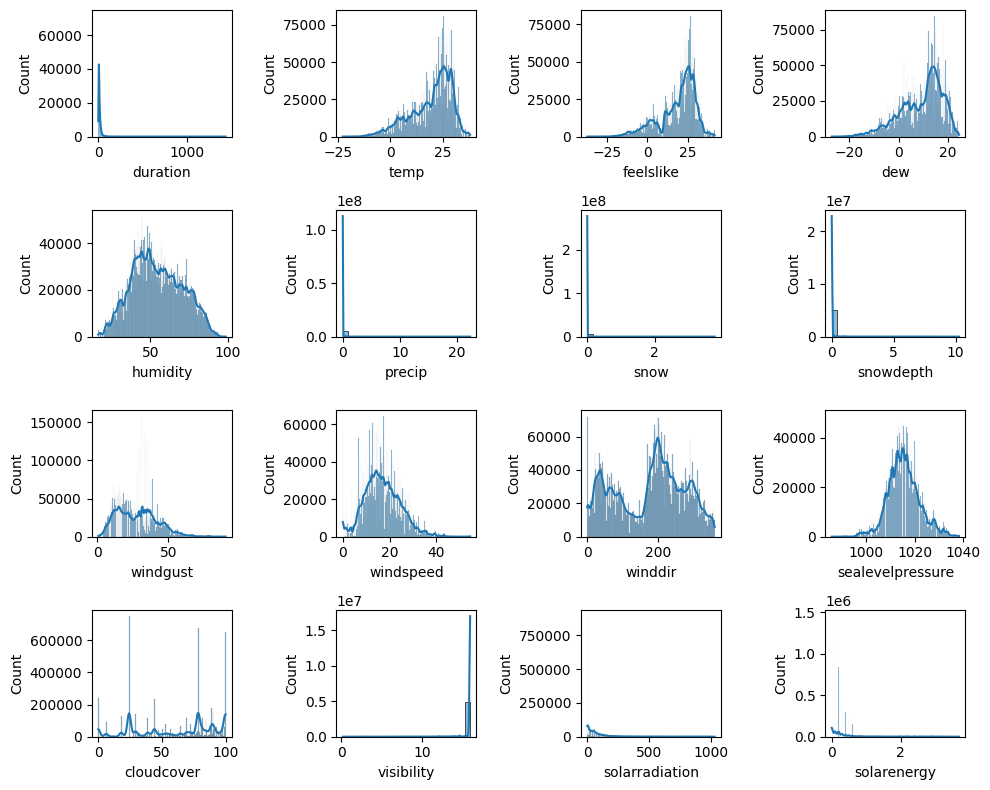

In [ ]:
# Define the number of rows and columns you want
num_rows = 4
num_cols = 4

# Define the figure size
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Flatten the axis array for easier indexing
axs = axs.flatten()

# Get a list of numerical columns
numerical_cols = clean_bike.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude columns that we don't want
excluded_cols = ['start_lat', 'start_lng', 'end_lat', 'end_lng']
numerical_cols = [col for col in numerical_cols if col not in excluded_cols]

# Create a density plot for each numerical column
for i, col in enumerate(numerical_cols):
    sns.histplot(data=clean_bike, x=col, kde=True, ax=axs[i])

# If there are fewer numerical columns than subplots, remove the extra subplots
if len(numerical_cols) < num_rows * num_cols:
    for i in range(len(numerical_cols), num_rows * num_cols):
        fig.delaxes(axs[i])

# We adjust the layout so that the subplots do not overlap
plt.tight_layout()
# We display the plot
plt.show()

### Perform Visualization to see Distributions and trends for Categorical Features

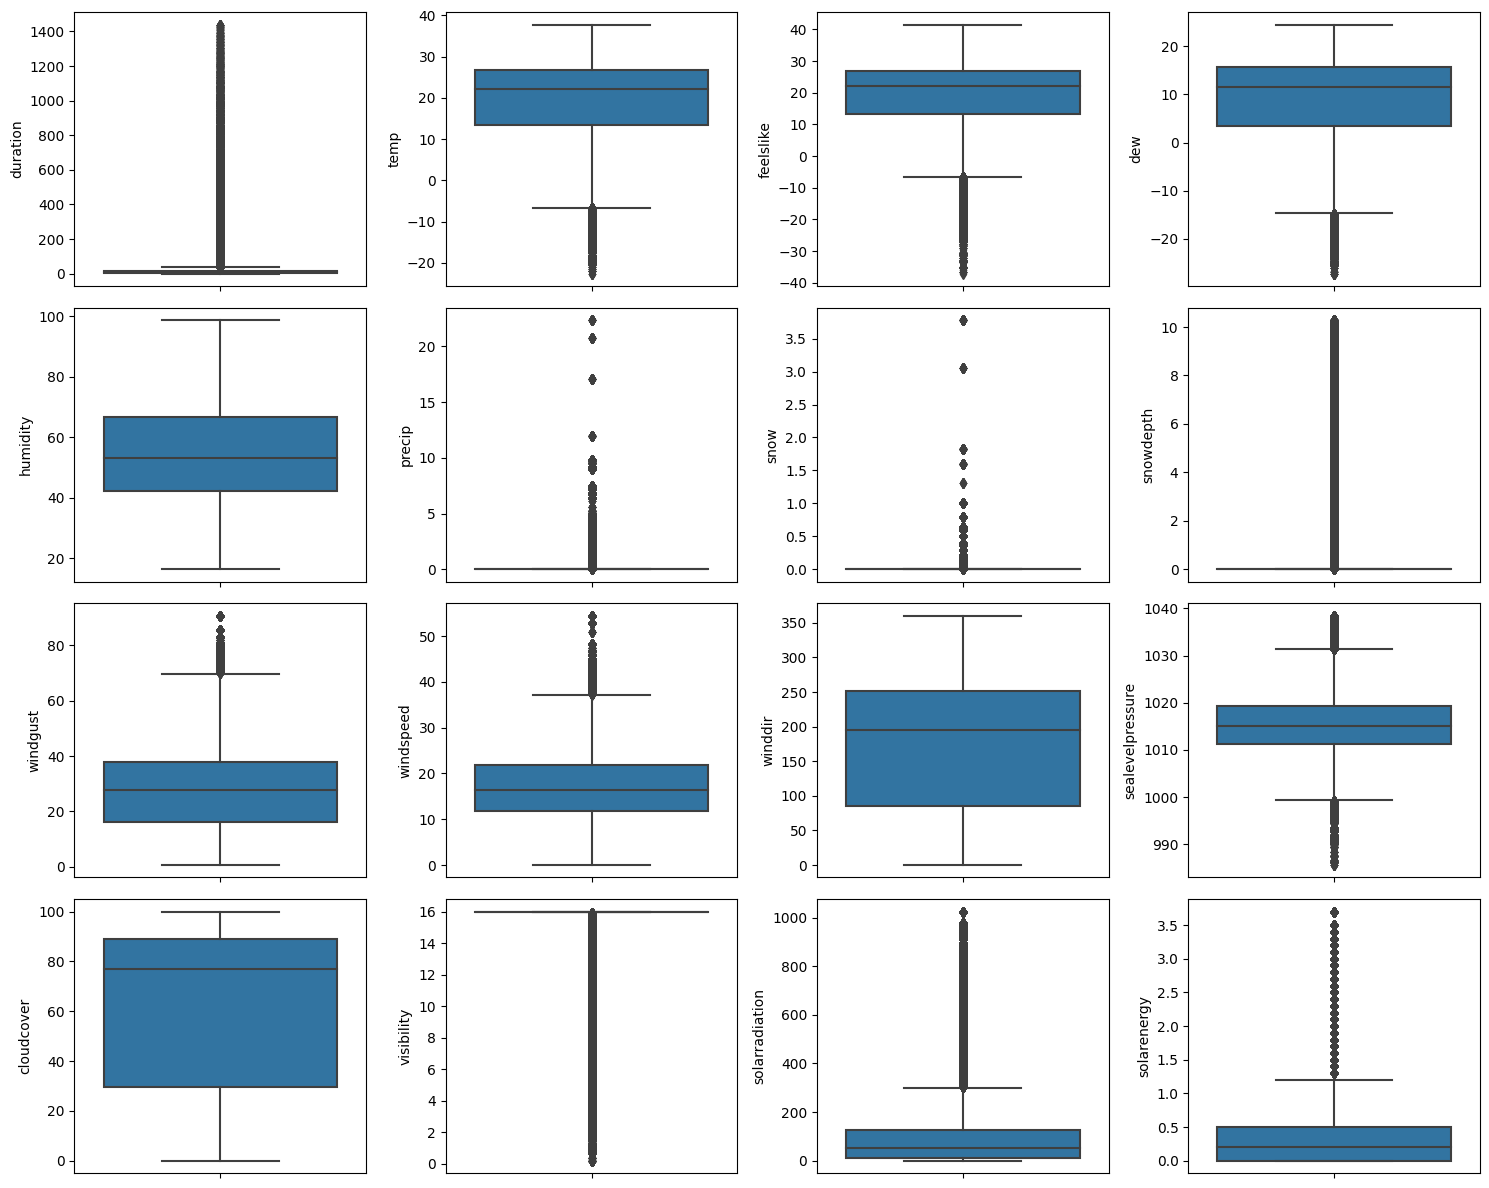

In [ ]:
# Define the number of rows and columns you want
num_rows = 4
num_cols = 4

# Define the figure size
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 12))  # Change figure size here

# Flatten the axis array for easier indexing
axs = axs.flatten()

# Get a list of numerical columns
numerical_cols = clean_bike.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude columns that we don't want
excluded_cols = ['start_lat', 'start_lng', 'end_lat', 'end_lng']
numerical_cols = [col for col in numerical_cols if col not in excluded_cols]

# Create a box plot for each numerical column
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=col, data=clean_bike, ax=axs[i])

# If there are fewer numerical columns than subplots, remove the extra subplots
if len(numerical_cols) < num_rows * num_cols:
    for i in range(len(numerical_cols), num_rows * num_cols):
        fig.delaxes(axs[i])

# We adjust the layout so that the subplots do not overlap
plt.tight_layout()
# We display the plot
plt.show()

**Finding 2**

---



From Figures 1 and 2 above, it can be observed that several features (columns) have a normal data distribution, such as humidity and sealevelpressure, but some other features are right-skewed and display outliers. However, we will retain these data as we cannot drop outliers without a valid reason. These will be normalized in the model or handled using modules that are robust to outliers. The rest of the features have uniform values and will be dropped if they do not have an impact on the analysis and model.

In the next step, we will visualize the distribution of our categorical variables. This will allow us to better understand the data by showing the count of each category in our dataset. We will do this by generating countplots for each of the categorical columns.

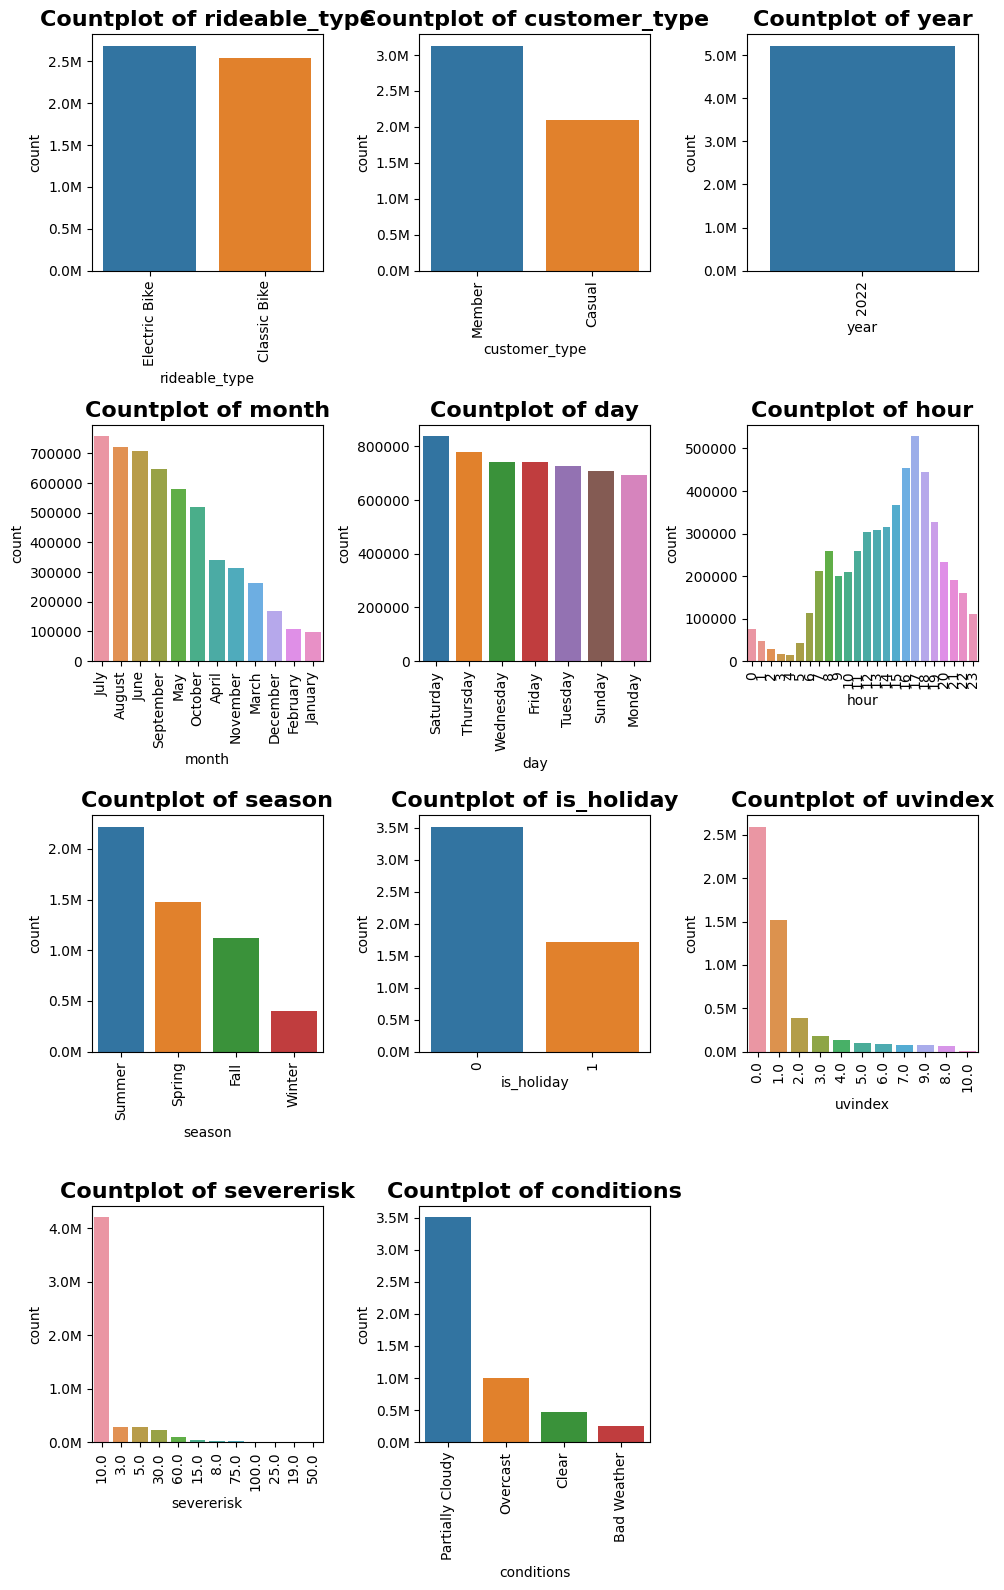

In [ ]:
# This function is used to format y-axis labels in the millions
def millions(x, pos):
    '''
    Define function is used to format y-axis labels in the millions
    '''
    return '%1.1fM' % (x * 1e-6)

# This creates a formatter that we'll use for the y-axis
million_formatter = FuncFormatter(millions)

# This is the list of categorical columns we want to plot
cat_cols = ['rideable_type', 'customer_type', 'year', 'month',
            'day', 'hour', 'season', 'is_holiday', 'uvindex', 'severerisk', 'conditions']

# We create a grid of subplots with 4 rows and 3 columns
fig, axs = plt.subplots(4, 3, figsize=(10,16))

# We loop through the categorical columns and plot each one
for i, col in enumerate(cat_cols):
    row = i // 3
    col = i % 3
    # We order the bars based on their count, except for the 'hour' column
    order = clean_bike[cat_cols[i]].value_counts().index if cat_cols[i] != 'hour' else None
    # We plot the countplot of the column
    sns.countplot(x=cat_cols[i], data=clean_bike, ax=axs[row, col], order=order)
    # We use the formatter for the y-axis labels, except for 'month', 'day', and 'hour'
    if cat_cols[i] not in ['month', 'day', 'hour']:
        axs[row, col].yaxis.set_major_formatter(million_formatter)
    # We set the title of the plot
    axs[row, col].set_title('Countplot of ' + cat_cols[i], fontsize=16, fontweight='bold')
    # We rotate the labels on the x-axis for better readability
    axs[row, col].tick_params(axis='x', rotation=90)

# We remove the empty subplots, if there are less than 12 columns
for i in range(len(cat_cols), 12):
    fig.delaxes(axs.flatten()[i])

# We adjust the layout so that the subplots do not overlap
plt.tight_layout()
# We display the plot
plt.show()

From the countplots above, we can gain insights into the distribution of each categorical variable in our dataset. This includes 'rideable_type', 'customer_type', 'year', 'month', 'day', 'hour', 'season', 'is_holiday', 'uvindex', 'severerisk', and 'conditions'. The countplots provide an overview of the frequency of each category, which can help us understand the composition of our data and can guide further analysis and modeling. Note that any patterns or anomalies in these plots could be significant and should be investigated further.

### Outliers Analysis

In our data analysis, understanding the distribution of ride durations can provide valuable insights. However, outliers can often skew this understanding. Outliers are data points that are significantly different from others, which can be due to variations in the data or errors. In this next step, we will identify the percentage of outliers in the 'duration' column of our dataset, using the Interquartile Range (IQR) method. The IQR is a measure of statistical dispersion, representing the middle 50% of the data. Data points that fall below Q1 - 1.5IQR or above Q3 + 1.5IQR are considered outliers.

In [ ]:
# First, we need to calculate the IQR of the 'duration' column
Q1 = clean_bike['duration'].quantile(0.25)
Q3 = clean_bike['duration'].quantile(0.75)
IQR = Q3 - Q1

# Define the range for non-outliers
non_outlier_range = (clean_bike['duration'] >= (Q1 - 1.5 * IQR)) & (clean_bike['duration'] <= (Q3 + 1.5 * IQR))

# Calculate the percentage of non-outliers and outliers
non_outlier_percentage = non_outlier_range.mean() * 100
outlier_percentage = 100 - non_outlier_percentage

print(f"Percentage of non-outliers: {non_outlier_percentage}%")
print(f"Percentage of outliers: {outlier_percentage}%")


Percentage of non-outliers: 93.03061586697756%
Percentage of outliers: 6.969384133022444%


**Finding 3**

---



From our calculation, we find that about 93.03% of the data in the 'duration' column are non-outliers, and the remaining 6.97% are considered outliers. These outliers represent rides that have significantly shorter or longer durations compared to the majority. This information will be useful when we perform further analysis or build predictive models, as we might need to handle these outliers to improve the accuracy of our results. In the context of our bike-sharing data, these outliers represent unusually long rides based on duration boxplot in figure 2 (e.g., the user kept the bike out for an entire day)."

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
clean_bike = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/clean_bike.csv")

## Exploratory Data Analysis on Natural Factors

In the following analysis, we will examine the number of bike rides over time throughout 2022. This line chart will plot the count of rides for each day, providing a clear visual representation of the bike usage trend over time. Notably, we will highlight the dates with the highest and lowest number of rides. By doing so, we can potentially identify certain patterns or significant events that could influence bike usage.

In [ ]:
# Convert 'started_at' to datetime and extract the date
clean_bike['full_date'] = pd.to_datetime(clean_bike['started_at']).dt.date

# Group by the 'date' column and count the number of rides for each date
grouped = clean_bike.groupby('full_date').size().reset_index(name='counts')

# Sort the dataframe by date from oldest to newest
grouped = grouped.sort_values('full_date')

# Find the dates with the maximum and minimum number of rides
max_date = grouped.loc[grouped['counts'].idxmax()]['full_date']
min_date = grouped.loc[grouped['counts'].idxmin()]['full_date']

# Create a line plot
fig = go.Figure(data=go.Scatter(x=grouped['full_date'], y=grouped['counts'], mode='lines'))

# Add annotations and lines pointing to the highest and lowest number of rides
fig.add_annotation(
    x=max_date,
    y=grouped['counts'].max(),
    text="The highest number of rides in one day",
    showarrow=True,
    arrowhead=1,
    ax=50,
    ay=-50,
)

fig.add_annotation(
    x=min_date,
    y=grouped['counts'].min(),
    text="The lowest number of rides in one day",
    showarrow=True,
    arrowhead=1,
    ax=-50,
    ay=-350,
)

fig.update_layout(
    title_text="<b>Number of Rides Over Time</b><br>",
    title_x=0.5,
    title_font=dict(size=24, family='Helvetica'),
    height=600
)

# Display the plot
fig.show()

**Finding 4**

---

- The date with the highest number of bike rides in one day was July 9th, 2022. This could suggest that summer months witness higher bike usage, potentially due to favorable weather conditions or popular outdoor activities.

- Conversely, the date with the lowest number of bike rides was December 23rd, 2022. This could be attributed to factors such as colder weather conditions, holiday travel, or a typical decrease in outdoor activities during the winter months.

In [ ]:
# Create a variable, type_group, that contains counts of rideable_type and customer_type
type_group = clean_bike[['rideable_type', 'customer_type']].value_counts().reset_index(name='counts')

# Define a color map
color_map = {'Casual': 'blue', 'Member': 'orange'}

# Create a stacked bar chart using plotly express
fig = px.bar(type_group, x='rideable_type', y='counts',
             color='customer_type', barmode='stack',
             color_discrete_map=color_map,
             width=600, height=600,
             labels={
                 'rideable_type':'Bike Types',
                 'counts': "Number of Rides",
                 'customer_type':'Customer Type'
             },
             hover_data={'counts':True})

# Add a title and subtitle
fig.update_layout(
    title_text="<b>Classic vs Electric Bike by Customer Type</b><br>"
               "<sup>Casual users slightly tend to prefer Electric Bikes</sup>",
    title_x=0.5,
    title_font=dict(size=24, family='Helvetica'),
    legend=dict(orientation="v", yanchor="auto")  # Changed the y parameter
)

# Display the chart
fig.show()

**Finding 5**

---

- Members use Classic Bikes more often (1.6M rides) compared to Electric Bikes (1.5M rides).
- Casual customers use Electric Bikes more frequently (1.1M rides) compared to Classic Bikes (930k rides).

This suggests that while Members prefer Classic Bikes, Casual customers have a slight preference for Electric Bikes. This could be due to a variety of factors, such as the availability of bike types, the distances traveled, the terrain, or the physical effort required.

In [ ]:
# Compute the median ride duration for each customer type, rounding to two decimal places
# Note: Explicitly selecting the 'duration' column to avoid FutureWarning about default behavior change
median_ride_length = round(clean_bike.groupby('customer_type', as_index=False)['duration'].median(), 2)

# Define a color map
color_map = {'Casual': 'blue', 'Member': 'orange'}

# Create a bar chart using Plotly Express
fig = px.bar(median_ride_length, y='customer_type', x='duration',
             color='customer_type',
             color_discrete_map=color_map,
             height=300,
             text='duration',
             labels={'duration': 'Median Ride Length (minutes)', 'customer_type': 'Customer Type'},
             hover_name='customer_type', hover_data={'customer_type': False, 'duration': True})

# Add a title and subtitle to the chart
fig.update_layout(
    title_text="<b>Median Ride Length by Customer Type</b><br>"
               "<sup>Casual customers typically have longer ride durations</sup>",
    title_x=0.5,
    title_font=dict(size=24, family='Helvetica'),
    legend=dict(orientation="v", yanchor="auto")  # Changed the y parameter
)

# Display the chart
fig.show()

**Finding 6**

---
- Casual customers typically have longer ride durations, with a median of 13.1 minutes.
- Members typically have shorter ride durations, with a median of 9.0 minutes.

This suggests that Casual customers may be using the bikes for leisure or tourism purposes, where they're less concerned about time and more interested in the experience. On the other hand, Members, who are likely to be regular commuters, tend to have shorter rides, possibly using the bikes for practical purposes like commuting to work or running errands.


In [ ]:
# Create a variable 'month_group' that contains the counted 'month' and 'customer_type'
month_group = clean_bike[['month', 'customer_type']].value_counts().reset_index(name='counts')

# Create a bar chart with Plotly Express
fig = px.bar(month_group, x="month", y="counts",
             color='customer_type', barmode='group',
             width=1000, height=600,
             labels={
                 "month": "Month",
                 "counts": "Number of Rides",
                 'customer_type':'Customer Type'
             },
             color_discrete_map={
                 'Casual': 'Blue',
                 'Member': 'Orange'
             })

# Ensure all x-axis labels are shown
fig.update_xaxes(tickmode='linear')

# Order the x-axis by the months
fig.update_xaxes(categoryorder='array',
                 categoryarray= ['January', 'February', 'March','April', 'May', 'June',
                                 'July', 'August', 'September', 'October', 'November', 'December',])

# Add a title and subtitle, center-aligned, with specified font and size
fig.update_layout(
    title_text="<b>Monthly Rides Distribution of Each Customer Type</b><br>"
               "<sup>The Peak of Most Rides Occurred in July</sup>",
    title_x=0.5,
    title_font=dict(size=24, family='Helvetica'),
    legend=dict(orientation="v", yanchor="auto")  # Changed the y parameter
)

# Display the chart
fig.show()

**Finding 7**

---

- For Members, the highest number of rides occur in August, followed by July and September. This suggests that Members, likely regular commuters, use bike sharing most frequently in the late summer and early fall.

- For Casual customers, the highest number of rides also occur in the summer months, with July having the most rides, followed by June and August. This suggests that Casual customers, who might be tourists or occasional users, also use bike sharing more frequently in the summer.

We will further confirm this seasonal interest in the following chart.


In [ ]:
# Create a variable 'season_group' that contains the counted 'season' and 'customer_type'
season_group = clean_bike[['season', 'customer_type']].value_counts().reset_index(name='counts')

# Create a bar chart with Plotly Express
fig = px.bar(season_group, x='season', y='counts', color='customer_type',
             width=1000, height=600,
             labels={
                 'season':'Season',
                 'counts': 'Number of Rides',
                 'customer_type': 'Customer Type'
             },
             color_discrete_map={
                 'Casual': 'Blue',
                 'Member': 'Orange'
             })

# Order the x-axis by the seasons
fig.update_xaxes(categoryorder='array',
                 categoryarray= ["Spring", "Summer", "Fall", "Winter"])

# Add a title and subtitle, center-aligned, with specified font and size
fig.update_layout(
    title_text="<b>Cyclistic Bikeshare Ridership by Season</b><br>"
               "<sup>Summer is the Favorite Season for Riding Cyclistic Bikes</sup>",
    title_x=0.5,
    title_font=dict(size=24, family='Helvetica'),
    legend=dict(orientation="v", yanchor="auto")  # Changed the y parameter
)
# Display the chart
fig.show()

**Finding 8**

---
After examining the chart above, we can affirm that both Members and Casual customers use bike sharing the most during the summer months, probably due to more favorable weather conditions. Interestingly, Members also show some usage during winter, potentially because they continue their regular activities, such as commuting to work, even in colder weather. But, some member may choose to use cars or public transportation rather than bikes.

This seasonal pattern is vital to consider when planning bike availability, maintenance schedules, and marketing campaigns. For instance, additional resources might be allocated during the summer months to accommodate the increased demand.


In [ ]:
# Create a grouped dataset containing counts of rides for each day and customer type
day_group = clean_bike[['day', 'customer_type']].value_counts().reset_index(name='counts')

# Create a bar chart with Plotly Express
fig = px.bar(day_group, x='day', y='counts',
             color='customer_type', barmode='group', width=1000, height=600,
             labels={
                 'day':'Day of Week',
                 'counts': 'Number of Rides',
                 'customer_type': 'Customer Type'
             },
             color_discrete_map={
                 'Casual': 'Blue',
                 'Member': 'Orange'
             })

# Order the x-axis by the days of the week
fig.update_xaxes(categoryorder='array',
                 categoryarray= ["Monday", "Tuesday", "Wednesday",
                                 "Thursday", "Friday", "Saturday", "Sunday"])

# Add a title and subtitle, center-aligned, with specified font and size
fig.update_layout(
    title_text="<b>Weekly Bike Usage Distribution</b><br>"
               "<sup>Breakdown by Customer Type</sup>",
    title_x=0.5,
    title_font=dict(size=24, family='Helvetica'),
    legend=dict(orientation="v", yanchor="auto")  # Changed the y parameter
)
# Display the chart
fig.show()


**Finding 9**

---
- The most rides occur on Thursdays for Members, followed by Wednesdays and Tuesdays. This suggests that Members, who are likely to be regular commuters, use bike sharing most frequently on weekdays.

- For Casual customers, the most rides occur on Saturdays, followed by Sundays and Fridays. This suggests that Casual customers, who might be tourists or occasional users, use bike sharing more frequently on weekends.

In summary, there's a clear difference in usage patterns between Members and Casual customers. Members use bikes more often on weekdays, likely for commuting, while Casual customers use bikes more often on weekends, possibly for leisure activities or tourism.

This insight could be valuable for devising different marketing strategies for Members and Casual customers and for planning bike availability and maintenance schedules.


In [ ]:
# Create a grouped dataset containing counts of rides for each hour and customer type
hour_group = clean_bike[['hour', 'customer_type']].value_counts().reset_index(name='counts')

# Sort the DataFrame by 'hour' and 'customer_type'
hour_group = hour_group.sort_values(['hour', 'customer_type'], ascending=[True, True])

# Define a color map
color_map = {'Casual': 'blue', 'Member': 'orange'}

# Create a line chart using Plotly Express
fig = px.line(hour_group, x='hour', y='counts',
              color='customer_type', markers=True, width=1000, height=600,
              color_discrete_map=color_map,
              labels={
                  'hour': 'Hour',
                  'counts': 'Number of Rides',
                  'customer_type': 'Customer Type'
              })

# Ensure all x-axis labels are displayed and start from 0
fig.update_xaxes(tickmode='linear', range=[0, max(hour_group['hour'])])

# Add a title and subtitle to the chart
fig.update_layout(
    title_text="<b>Rides Throughout the Day</b><br>"
               "<sup>Rise in rides observed during morning (8 AM) and evening (5 PM) rush hours</sup>",
    title_x=0.5,
    title_font=dict(size=24, family='Helvetica'),
    legend=dict(orientation="v", yanchor="auto")  # Changed the y parameter
)

# Display the chart
fig.show()

**Finding 10**

---

- For Members, the number of rides peaks at 8 AM and 5 PM, likely corresponding to typical commuting times. The least number of rides occur at 3 AM, followed by 4 AM.
- For Casual customers, the number of rides also peaks at 5 PM, suggesting that Casual customers might also use the bikes for commuting or for leisure activities in the afternoon and early evening. The least number of rides occur at 4 AM, followed by 5 AM.

This hourly pattern shows that both Members and Casual customers have the highest usage during rush hours, but Members seem to use bike sharing more for commuting, with high usage early in the morning, while Casual customers use bike sharing more in the late afternoon and early evening. This insight could be valuable for planning bike availability during peak hours.

In [ ]:
# Create a grouped dataset containing counts of rides for each hour, customer type, and holiday status
hour_group = clean_bike[['hour', 'customer_type', 'is_holiday']].value_counts().reset_index(name='counts')

# Sort the DataFrame by 'hour', 'customer_type', and 'is_holiday'
hour_group = hour_group.sort_values(['hour', 'customer_type', 'is_holiday'], ascending=[True, True, True])

# Split the data into two groups based on the holiday status
hour_group_holiday = hour_group[hour_group['is_holiday'] == 1]
hour_group_workday = hour_group[hour_group['is_holiday'] == 0]

# Define a color map
color_map = {'Casual': 'blue', 'Member': 'orange'}

# Create a subplot with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=("Holidays", "Workdays"), shared_yaxes=True)

# Create a line chart for holiday
for customer_type in hour_group['customer_type'].unique():
    fig.add_trace(go.Scatter(x=hour_group_holiday[hour_group_holiday['customer_type'] == customer_type]['hour'],
                             y=hour_group_holiday[hour_group_holiday['customer_type'] == customer_type]['counts'],
                             mode='lines+markers',
                             name=customer_type,
                             line=dict(color=color_map[customer_type])),
                  row=1, col=1)

# Create a line chart for workday
for customer_type in hour_group['customer_type'].unique():
    fig.add_trace(go.Scatter(x=hour_group_workday[hour_group_workday['customer_type'] == customer_type]['hour'],
                             y=hour_group_workday[hour_group_workday['customer_type'] == customer_type]['counts'],
                             mode='lines+markers',
                             name=customer_type,
                             line=dict(color=color_map[customer_type]),
                             showlegend=False),  # Do not show legend for this plot
                  row=1, col=2)

# Ensure all x-axis labels are displayed and start from 0
fig.update_xaxes(tickmode='linear', range=[0, max(hour_group['hour'])])

# Ensure all y-axis labels are displayed
fig.update_yaxes(showticklabels=True)

# Add a title and subtitle to the chart
fig.update_layout(
    title_text="<b>Patterns of Bike Rides: Holidays vs Workdays</b><br>"
               "<sup>Overall, more bike rides occur on workdays",
    title_x=0.5,
    width=1000, height=600,
    title_font=dict(size=24, family='Helvetica'),
    legend=dict(orientation="h", yanchor="middle", y=-0.2, xanchor="center", x=0.5)  # Changed the y parameter
)

# Display the chart
fig.show()

**Finding 11**

---
This pattern shows that both Members and Casual customers have the highest usage during rush hours, but Members seem to use bike sharing more for commuting, with high usage early in the morning, while Casual customers use bike sharing more in the late afternoon and early evening.

Notably, the usage patterns on holidays and workdays are somewhat similar for both types of customers. However, the volume of rides is generally higher on workdays, especially for Members. This likely reflects the fact that Members use bike sharing as a part of their regular commuting, which is less frequent on holidays.

In [ ]:
# Create a variable 'condition_group' that groups and counts 'conditions' and 'customer_type'
condition_group = clean_bike[['conditions', 'customer_type']].value_counts().reset_index(name='counts')

# Generate a bar chart
fig = px.bar(condition_group, x='conditions', y='counts', color='customer_type',
             width=1000, height=600, barmode='group',
             color_discrete_map={'Member':'orange', 'Casual':'blue'},
             labels={
                 'conditions':'Condition',
                 'counts': 'Number of Rides',
                 'customer_type': 'Customer Type'
             })

# Add a title and a subtitle
fig.update_layout(
    title_text="<b>Number of Trips by Weather Condition</b><br>"
               "<sup>Most Cyclists Prefer Riding on Partly Cloudy Days</sup>",
    title_x=0.5,
    title_font=dict(size=24, family='Helvetica'),
    legend=dict(orientation="v", yanchor="auto")  # Changed the y parameter
)
# Display the chart
fig.show()

**Finding 12**


---

- For both Members and Casual customers, the highest number of rides occur under "Partially Cloudy" conditions, followed by "Overcast" and "Clear" conditions. The least number of rides occur under "Bad Weather" conditions. This suggests that the weather plays a significant role in bike usage, with more rides occurring under favorable weather conditions.
- The difference in the number of rides between Members and Casual customers is largest under "Bad Weather" conditions, indicating that Members are more willing to use bike sharing even in less favorable weather conditions.

These insights could be valuable for planning bike availability and maintenance schedules around different weather conditions. For example, additional resources might be needed under favorable weather conditions to accommodate the higher demand, while more targeted marketing could be done to encourage more usage under less favorable conditions.

In [ ]:
# Create a variable 'condition_group' that groups 'conditions' and 'customer_type' and calculates the median 'duration'
condition_group = clean_bike.groupby(['conditions', 'customer_type'])['duration'].median().reset_index(name='median_duration')

# Convert 'conditions' to a Categorical type and specify the order of categories
ordered_categories = ['Partly Cloudy', 'Overcast', 'Clear', 'Bad Weather']
condition_group['conditions'] = pd.Categorical(condition_group['conditions'], categories=ordered_categories, ordered=True)

# Sort 'conditions' in the specified order
condition_group.sort_values(by='conditions', inplace=True)

# Generate a bar chart
fig = px.bar(condition_group, x='conditions', y='median_duration', color='customer_type',
             width=1000, height=600, barmode='group',
             color_discrete_map={'Member':'orange', 'Casual':'blue'},
             labels={
                 'conditions':'Condition',
                 'median_duration': 'Median Duration (in minutes)',
                 'customer_type': 'Customer Type'
             })

# Add a title and a subtitle
fig.update_layout(title_text="<b>Median Duration of Trips by Weather Condition</b><br>"
                             "<sup>Most Cyclists Prefer Riding on Partly Cloudy Days</sup>",
                  title_x=0.5,
                  title_font=dict(size=24, family='Helvetica'),
                  legend=dict(orientation="v", yanchor="auto")  # Changed the y parameter
)

# Display the chart
fig.show()

**Finding 13**

---
- Both Members and Casual customers tend to have longer rides when the weather is "Partially Cloudy". This suggests that "Partially Cloudy" conditions might be the most comfortable or appealing for bike rides.
- Casual customers tend to have longer median ride durations compared to Members under all weather conditions. This could be because Casual customers, who might be tourists or occasional users, use bike sharing for leisure or sightseeing, while Members, who are likely regular commuters, use bike sharing for more routine, shorter-distance travel.
- The difference in median ride duration between Members and Casual customers under "Bad Weather" conditions, This could suggest that while Casual customers are more influenced by weather conditions in their decision to take longer or shorter rides, Members' ride durations are more consistent across different weather conditions.

These insights could be valuable for understanding customer behavior and preferences and for planning marketing strategies. For example, marketing campaigns could highlight the enjoyment of bike rides under partially cloudy conditions to attract more Casual customers, while service improvements could be targeted at ensuring a consistent experience for Members regardless of the weather.

In [ ]:
# Round the temperature to the nearest whole number to simplify the data
clean_bike['temp_rounded'] = clean_bike['temp'].round()

# Group the data by the rounded temperature and customer type, counting the number of rides for each group
grouped = clean_bike.groupby(['temp_rounded', 'customer_type']).size().reset_index(name='counts')

# Create a line graph with the grouped data
# X-axis represents the rounded temperature
# Y-axis represents the number of rides
# Different customer types are represented by different colors
fig = px.line(grouped,
              x='temp_rounded',
              y='counts',
              color='customer_type',
              width=1000, height=600,
              labels={'counts':'Number of Rides', 'temp_rounded':'Temperature (°C)', 'customer_type':'Customer Type'},
              color_discrete_map={'Member':'orange', 'Casual':'blue'})

# Update the layout of the plot
# Set the title text, position, and font
# Set the legend orientation and y anchor
fig.update_layout(
    title_text="<b>Number of Rides by Temperature and Customer Type</b><br>"
               "<sup>Overall, both Member and Casual riders prefer warmer temperatures for their rides</sup>",
    title_x=0.5,
    title_font=dict(size=24, family='Helvetica'),
    legend=dict(orientation="v", yanchor="auto")  # Changed the y parameter
)

# Display the plot
fig.show()

**Finding 14**

---


- Both Members and Casual customers show a general preference for bike rides in warmer temperatures. The number of rides increases as the temperature rises, peaking at around 24°C - 28°C, and then slightly decreases as the temperature continues to increase.
- The number of rides for both Members and Casual customers is very low at colder temperatures, indicating that cold weather might be a deterrent for bike usage.
- For every rounded temperature, Members have a higher number of rides compared to Casual customers. However, the difference between the number of rides by Members and Casual customers becomes smaller as the temperature rises, indicating that warmer temperatures might be more appealing for Casual customers to use bike sharing.

These insights could be useful for predicting bike usage based on weather forecasts and for planning bike availability and maintenance schedules. For example, more resources might be needed during warmer temperatures to accommodate the higher demand.

In [ ]:
# Round the temperature to the nearest whole number to simplify the data
clean_bike['temp_rounded'] = clean_bike['temp'].round()

# Group the data by the rounded temperature and customer type, calculating the median duration for each group
grouped = clean_bike.groupby(['temp_rounded', 'customer_type'])['duration'].median().reset_index(name='median_duration')
clean_bike.drop(columns='temp_rounded', inplace=True)

# Create a scatter plot with the grouped data
# X-axis represents the rounded temperature
# Y-axis represents the median duration
# Different customer types are represented by different colors
fig = px.scatter(grouped,
                 x='temp_rounded',
                 y='median_duration',
                 color='customer_type',
                 width=1000, height=600,
                 labels={'median_duration':'Median Duration', 'temp_rounded':'Temperature (°C)', 'customer_type':'Customer Type'},
                 color_discrete_map={'Member':'orange', 'Casual':'blue'})

# Update the layout of the plot
# Set the title text, position, and font
# Set the legend orientation and y anchor
fig.update_layout(
    title_text="<b>Median Duration of Rides by Temperature and Customer Type</b><br>"
               "<sup>Overall, both Member and Casual riders prefer warmer temperatures for their rides</sup>",
    title_x=0.5,
    title_font=dict(size=24, family='Helvetica'),
    legend=dict(orientation="v", yanchor="auto")  # Changed the y parameter
)

# Display the plot
fig.show()

**Finding 15**

---
- Both Members and Casual customers show a general trend of longer ride durations as the temperature increases. However, the increase in ride duration is more pronounced for Casual customers than for Members.
- The median ride duration for Casual customers is consistently higher than for Members across almost all temperatures, indicating that Casual customers tend to use bike sharing for longer trips regardless of the temperature.
- The difference in median ride duration between Members and Casual customers becomes larger as the temperature rises. For example, at around 30°C, the median ride duration for Casual customers is approximately 4 minutes longer than for Members. This could suggest that warmer temperatures might be more encouraging for Casual customers to take longer rides.
- There are some fluctuations and outliers in the data, particularly for colder temperatures, likely due to fewer data points at these temperatures.

These insights could be useful for understanding customer behavior and for planning marketing and customer engagement strategies. For example, promotions for longer rides could be targeted at Casual customers during warmer temperatures.


In [ ]:
# Round the humidity to the nearest whole number to simplify the data
clean_bike['humidity_rounded'] = clean_bike['humidity'].round()

# Group the data by the rounded humidity and customer type, counting the number of rides for each group
grouped = clean_bike.groupby(['humidity_rounded', 'customer_type']).size().reset_index(name='counts')

# Create a line graph with the grouped data
# X-axis represents the rounded humidity
# Y-axis represents the number of rides
# Different customer types are represented by different colors
fig = px.scatter(grouped,
              x='humidity_rounded',
              y='counts',
              color='customer_type',
              width=1000, height=600,
              labels={'counts':'Number of Rides', 'humidity_rounded':'Humidity (%)', 'customer_type':'Customer Type'},
              color_discrete_map={'Member':'orange', 'Casual':'blue'})

# Update the layout of the plot
# Set the title text, position, and font
# Set the legend orientation and y anchor
fig.update_layout(
    title_text="<b>Number of Rides by Humidity and Customer Type</b><br>"
               "<sup>Observations on how humidity affects the number of rides for different customer types</sup>",
    title_x=0.5,
    title_font=dict(size=24, family='Helvetica'),
    legend=dict(orientation="v", yanchor="auto")  # Changed the y parameter
)

# Display the plot
fig.show()


**Finding 16**

---

- Both Casual and Member customers use the bike sharing service across a wide range of humidity levels. There's no clear trend of avoiding bike rides in high humidity.
- The number of rides drops significantly at very high humidity levels (around 95-100%). This could be due to uncomfortable or unfavorable weather conditions associated with high humidity, such as heavy rain or extreme heat.

In general, there doesn't seem to be a significant difference in the number of rides between Casual and Member customers at the same humidity level. This suggests that humidity might not be a strong factor in determining whether a person chooses to use the bike sharing service, regardless of their customer type.

In [ ]:
# Round the humidity to the nearest whole number to simplify the data
clean_bike['humidity_rounded'] = clean_bike['humidity'].round()

# Group the data by the rounded humidity and customer type, getting the median duration for each group
grouped = clean_bike.groupby(['humidity_rounded', 'customer_type'])['duration'].median().reset_index(name='median_duration')
clean_bike.drop(columns='humidity_rounded', inplace=True)

# Create a scatter plot with the grouped data
# X-axis represents the rounded humidity
# Y-axis represents the median duration
# Different customer types are represented by different colors
fig = px.scatter(grouped,
                 x='humidity_rounded',
                 y='median_duration',
                 color='customer_type',
                 width=1000, height=600,
                 labels={'median_duration':'Median Duration', 'humidity_rounded':'Humidity (%)', 'customer_type':'Customer Type'},
                 color_discrete_map={'Member':'orange', 'Casual':'blue'})

# Update the layout of the plot
# Set the title text, position, and font
# Set the legend orientation and y anchor
fig.update_layout(
    title_text="<b>Median Duration of Rides by Humidity and Customer Type</b><br>"
               "<sup>Observations on how humidity affects the duration of rides for different customer types</sup>",
    title_x=0.5,
    title_font=dict(size=24, family='Helvetica'),
    legend=dict(orientation="v", yanchor="auto")  # Changed the y parameter
)

# Display the plot
fig.show()


**Finding 17**

---
- For both customer types ('Casual' and 'Member'), the median duration of rides tends not to vary significantly with the humidity level. In other words, humidity doesn't appear to have a strong impact on the length of rides.
- Casual customers tend to have longer median ride durations than members across all humidity levels. This trend is consistent with previous findings and suggests that casual customers may use the service for leisure or exercise, whereas members may use it for shorter, more practical trips (e.g., commuting).
- There are some spikes in median ride duration at certain humidity levels for both types of customers. However, these spikes may be due to other factors, or they could simply be random variations.
- It's worth noting that data points for extremely high humidity levels (e.g., above 95%) are relatively scarce. Therefore, conclusions about ride behaviors under such conditions may not be as reliable due to the small sample size.

Overall, while humidity doesn't seem to affect the length of rides significantly, it's clear that casual customers generally ride for longer durations than members, regardless of the humidity level.

In [ ]:
def categorize_windspeed(windspeed):
    '''
    Create Function to categorize windspeed
    '''
    windspeed = round(windspeed)
    if windspeed == 0:
        return '0: Calm and still'
    elif 1 <= windspeed <= 5:
        return '1: Light winds'
    elif 6 <= windspeed <= 11:
        return '2: Light breeze'
    elif 12 <= windspeed <= 19:
        return '3: Gentle breeze'
    elif 20 <= windspeed <= 28:
        return '4: Moderate breeze'
    elif 29 <= windspeed <= 38:
        return '5: Fresh breeze'
    elif 39 <= windspeed <= 49:
        return '6: Strong breeze'
    elif 50 <= windspeed <= 61:
        return '7: Moderate gale'
    elif 62 <= windspeed <= 74:
        return '8: Fresh gale'
    elif 75 <= windspeed <= 88:
        return '9: Strong gale'
    elif 89 <= windspeed <= 102:
        return '10: Whole gale'
    elif 103 <= windspeed <= 118:
        return '11: Storm'
    else:
        return '12: Hurricane'

# Apply the function to the 'windspeed' column and create a new column 'windspeed_category'
clean_bike['windspeed_category'] = clean_bike['windspeed'].apply(categorize_windspeed)

# Group the data by 'windspeed_category' and 'customer_type', and count the size of each group
grouped = clean_bike.groupby(['windspeed_category', 'customer_type']).size().reset_index(name='counts')

# Convert the 'windspeed_category' to Categorical type for proper ordering in the plot
grouped['windspeed_category'] = pd.Categorical(grouped['windspeed_category'], categories=[
    '0: Calm and still',
    '1: Light winds',
    '2: Light breeze',
    '3: Gentle breeze',
    '4: Moderate breeze',
    '5: Fresh breeze',
    '6: Strong breeze',
    '7: Moderate gale',
    '8: Fresh gale',
    '9: Strong gale',
    '10: Whole gale',
    '11: Storm',
    '12: Hurricane'], ordered=True)

# Plotting
fig = px.bar(grouped,
             x='windspeed_category',
             y='counts',
             color='customer_type',
             barmode='group',
             width=1000, height=600,
             labels={'counts':'Number of Rides', 'windspeed_category':'Windspeed Category', 'customer_type':'Customer Type'},
             color_discrete_map={'Member':'orange', 'Casual':'blue'})

# Updating layout for the plot
fig.update_layout(
    title_text="<b>Number of Rides by Windspeed Category and Customer Type</b><br>"
               "<sup>Gentle Breeze Draws the Highest Number of Casual and Member Customers</sup>",
    title_x=0.5,
    title_font=dict(size=24, family='Helvetica'),
    legend=dict(orientation="v", yanchor="auto")
)

# Displaying the plot
fig.show()


**Finding 18**

---
- The most frequent wind conditions for both Casual and Member customers are "3: Gentle breeze" and "4: Moderate breeze". This could suggest that these wind conditions are the most comfortable or optimal for bike rides.
- The least frequent wind condition for both customer types is "7: Moderate gale". This indicates that as the wind speed increases, the number of bike rides decreases, probably due to safety or comfort concerns.
- Comparing the two customer types, Members tend to have more rides in all wind conditions than Casual customers. This could suggest that Members are more likely to use the bike sharing service regularly, regardless of the wind conditions.
- It's also noticeable that the difference in ride counts between the two customer types becomes smaller as the wind speed increases, especially from "6: Strong breeze" to "7: Moderate gale". This could suggest that under stronger wind conditions, the usage of the bike sharing service by Members decreases more significantly than that by Casual customers. However, given that the counts for these wind conditions are relatively low, this observation might not be as significant as it appears.


## Exploratory Data Analysis on Station Level

In [ ]:
# Group the data by 'customer_type' and 'start_station_name' and count the number of rides
grouped = clean_bike.groupby(['customer_type', 'start_station_name']).size().reset_index(name='counts')

# Sort the results in descending order and get the top 10 stations for each customer type
top_stations_casual = grouped[grouped['customer_type'] == 'Casual'].sort_values('counts', ascending=False).head(10)
top_stations_member = grouped[grouped['customer_type'] == 'Member'].sort_values('counts', ascending=False).head(10)

# Create a subplot with 2 rows and 1 column, add spacing between plots and titles for the plots
fig = make_subplots(rows=2, cols=1, subplot_titles=('Top 10 Stations for Casual Customers', 'Top 10 Stations for Member Customers'), vertical_spacing=0.25)

# Add a bar plot for the casual customers to the first row with blue color
fig.add_trace(go.Bar(x=top_stations_casual['start_station_name'], y=top_stations_casual['counts'], name='Casual', marker=dict(color='blue')), row=1, col=1)

# Add a bar plot for the member customers to the second row with orange color
fig.add_trace(go.Bar(x=top_stations_member['start_station_name'], y=top_stations_member['counts'], name='Member', marker=dict(color='orange')), row=2, col=1)

# Update layout with title font details
fig.update_layout(height=800, title_text="Top 10 Stations for Each Customer Type", title_font=dict(size=24, family="Helvetica"), title_x=0.5, showlegend=False)

# Display the chart
fig.show()

In [ ]:
# Count the occurrences of each start and end station name
start_station_counts = clean_bike['start_station_name'].value_counts()
end_station_counts = clean_bike['end_station_name'].value_counts()


# Convert the series to a DataFrame and reset the index
start_station_df = start_station_counts.reset_index()
end_station_df = end_station_counts.reset_index()

# Rename columns
start_station_df.columns = ['Station Name', 'check-ins station']
end_station_df.columns = ['Station Name', 'check-out station']

# Merge the start and end station dataframes
merged_df = pd.merge(start_station_df, end_station_df, on='Station Name', how='outer')

# Get the top 10 stations based on total usage
merged_df['Total Usage'] = merged_df['check-ins station'] + merged_df['check-out station']
top_stations_df = merged_df.nlargest(10, 'Total Usage')

# Create the horizontal bar plot
fig = go.Figure(data=[
    go.Bar(name='check-ins station', y=top_stations_df['Station Name'], x=top_stations_df['check-ins station'], orientation='h'),
    go.Bar(name='check-out station', y=top_stations_df['Station Name'], x=top_stations_df['check-out station'], orientation='h')
])

# Change the bar mode
fig.update_layout(barmode='stack', title='Total Usage of Top 10 Stations', legend=dict(traceorder='normal'))

# Show the figure
fig.show()

**Finding 19**

---

From this data, we can see that certain stations are more heavily used than others. These stations may be in locations that are convenient for users, such as near popular tourist destinations or workplace areas. The company could use this information to focus on maintaining bike availability and station functionality at these high-traffic stations to ensure a good user experience. Also, promotional efforts or partnerships could be centered around these high-use areas.

It's also interesting to note the difference between check-ins and check-outs at certain stations. For example, "DuSable Lake Shore Dr & North Blvd" has significantly more check-outs than check-ins. This could suggest that it's a popular destination for users, but they don't often start their trips from there. Understanding these patterns could help the company better manage bike distribution.


In [ ]:
# Make a copy of clean_bike
bike_copy = clean_bike.copy()

# Filter out 'Not Available'
bike_copy = bike_copy[bike_copy['start_station_name'] != 'Not Available']
bike_copy = bike_copy[bike_copy['end_station_name'] != 'Not Available']

# Calculate the number of ride_id for each station
rides_start = bike_copy['start_station_name'].value_counts().reset_index()
rides_end = bike_copy['end_station_name'].value_counts().reset_index()
rides_start.columns = ['station_name', 'counts_start']
rides_end.columns = ['station_name', 'counts_end']

# Merge rides_start and rides_end data
total_rides = pd.merge(rides_start, rides_end, on='station_name', how='outer')
total_rides = total_rides.fillna(0)
total_rides['total_counts'] = total_rides['counts_start'] + total_rides['counts_end']

# Create a dataframe that contains unique coordinates for each station
coords_start = bike_copy.groupby('start_station_name')[['start_lat', 'start_lng']].mean().reset_index()
coords_end = bike_copy.groupby('end_station_name')[['end_lat', 'end_lng']].mean().reset_index()
coords_start.columns = ['station_name', 'lat', 'lon']
coords_end.columns = ['station_name', 'lat', 'lon']

# Merge coords_start and coords_end data
coords = pd.concat([coords_start, coords_end]).drop_duplicates(subset=['station_name']).reset_index(drop=True)

# Merge total_rides and coords
final_data = pd.merge(total_rides, coords, on='station_name', how='inner')

# Plotting data
fig = px.scatter_mapbox(final_data, lat="lat", lon="lon", size="total_counts", color="total_counts",
                        color_continuous_scale=px.colors.sequential.Plasma, zoom=10, height=600,
                        hover_name="station_name", hover_data=["total_counts"])
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Display the chart
fig.show()

**Finding 20**

---

The bike sharing data reveals a significant trend related to the geographical location of stations. We find that the most popular stations, as evidenced by the highest total counts of rides starting or ending, are located at the outskirts of downtown Chicago, near the beach. This suggests a strong preference among bike share users for these locations.

It's likely that these areas are popular due to a combination of factors such as scenic routes, recreational activities, or convenience for residents living in these areas. Recognizing this trend, the company could consider strategies such as increasing bike availability at these stations, especially during peak usage times. Additionally, any future expansion plans could prioritize similar locations that are likely to see high demand.

Moreover, this information could be used to guide promotional efforts. For example, advertising targeted at potential casual users (such as tourists) could highlight the convenience of bike sharing for exploring popular beachside areas of the city.

# Construct

It's a good practice to create a copy of the original dataset before we start manipulating it. This way, we can always refer back to the original data if needed.

In [ ]:
# Create copy of clean_bike
clean_bike_new = clean_bike.copy()

## Create Duration Category

The 'duration' column represents the length of each trip, and it is currently a continuous variable. However, for our analysis, it might be more useful to consider 'duration' as a categorical variable. Therefore, we'll create categories for 'duration' based on descriptive statistics, the following intervals: 0-6.1, 6.1-10.4, 10.4-18.3, and 18.3 and above.


In [ ]:
# set limits for each category
bins = [0, 6.1, 10.4, 18.3, np.inf]
labels = ['0', '1', '2', '3']

# create new column with duration category
clean_bike_new['duration_category'] = pd.cut(clean_bike_new['duration'], bins=bins, labels=labels)
clean_bike_new['duration_category'] = clean_bike_new['duration_category'].astype('int')

To further prepare our data for modeling, we'll encode the 'start_station_name' and 'end_station_name' columns.
We'll use a custom function 'encode_station' that ranks each station based on its frequency of occurrence. The more frequently a station is used, the lower its rank. This method captures some information about the popularity of each station.


In [ ]:
def encode_station(df, column):
    """
    Define function to rank station name
    """
    station_counts = df[column].value_counts().reset_index().reset_index()
    station_counts.columns = [column + '_rank', column, 'count']
    df = pd.merge(df, station_counts[[column + '_rank', column]], on=column, how='left')
    return df

# Use the function to encode both columns
clean_bike_new = encode_station(clean_bike_new, 'start_station_name')
clean_bike_new = encode_station(clean_bike_new, 'end_station_name')

We've successfully encoded the 'start_station_name' and 'end_station_name' columns. We're checking if new features has been created.


In [ ]:
# Re-check all columns after some transformations
print(clean_bike_new.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at', 'duration',
       'customer_type', 'start_station_name', 'end_station_name', 'start_lat',
       'start_lng', 'end_lat', 'end_lng', 'year', 'month', 'date', 'day',
       'hour', 'season', 'is_holiday', 'temp', 'feelslike', 'dew', 'humidity',
       'precip', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'severerisk', 'conditions', 'full_date',
       'windspeed_category', 'duration_category', 'start_station_name_rank',
       'end_station_name_rank'],
      dtype='object')


Next, we'll drop several redundant columns as well as those that we won't use in our model. This is because they contain highly variable values that are not predictive, which could negatively affect our model's performance.

In [ ]:
# Define a list of columns to drop. These columns are not included in our analysis.
columns_to_drop = ['ride_id', 'started_at', 'start_station_name', 'end_station_name',
                   'ended_at', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'year', 'full_date']

# Drop the unnecessary columns from the dataframe
clean_bike_new = clean_bike_new.drop(columns=columns_to_drop)

Now, we'll transform some of our categorical variables into a format that's more suitable for machine learning models. First, we'll use label encoding to convert the categories in 'rideable_type', 'customer_type', 'month', 'day', and 'season' columns into numerical values. This process assigns each unique category in a column to an integer, making the data more digestible for our model.

In the case of 'windspeed_category', we'll extract numbers from the string values and convert them to integers.

Finally, for the 'conditions' column, we'll use one-hot encoding. This process creates new binary columns for each category in the column. We'll drop the first category to avoid multicollinearity, a scenario in which two or more variables in a model are highly correlated.


## Label and One-Hot Encoding

In [ ]:
# Replace 'rideable_type' categories with numerical values
clean_bike_new['rideable_type'] = clean_bike_new['rideable_type'].map({'Classic Bike': 0, 'Electric Bike': 1})

# Replace 'customer_type' categories with numerical values
clean_bike_new['customer_type'] = clean_bike_new['customer_type'].map({'Casual': 0, 'Member': 1})

# Replace month names with corresponding numerical values
months = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
          'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
clean_bike_new['month'] = clean_bike_new['month'].map(months)

# Replace day names with corresponding numerical values (if you decided to use ordinal encoding)
days = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
clean_bike_new['day'] = clean_bike_new['day'].map(days)

# Replace season names with corresponding numerical values
seasons = {'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4}
clean_bike_new['season'] = clean_bike_new['season'].map(seasons)

# Extract number from string dan change data type as int
clean_bike_new['windspeed_category'] = clean_bike_new['windspeed_category'].str.extract('(\d+)').astype(int)

# Perform one-hot encoding on the 'conditions' column, dropping the first category to avoid multicollinearity
clean_bike_new = pd.get_dummies(clean_bike_new, columns=['conditions'], drop_first=True)

We've successfully applied label encoding and one-hot encoding. Let's now verify the data types of our columns in the DataFrame. This step is crucial as it helps us ensure that all our data is in a suitable format for modeling.


In [ ]:
# Check data types of clean_bike_new
print(clean_bike_new.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5225885 entries, 0 to 5225884
Data columns (total 33 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   rideable_type                int64  
 1   duration                     float64
 2   customer_type                int64  
 3   month                        int64  
 4   date                         int64  
 5   day                          int64  
 6   hour                         int64  
 7   season                       int64  
 8   is_holiday                   int64  
 9   temp                         float64
 10  feelslike                    float64
 11  dew                          float64
 12  humidity                     float64
 13  precip                       float64
 14  snow                         float64
 15  snowdepth                    float64
 16  windgust                     float64
 17  windspeed                    float64
 18  winddir                      float64
 19  

Upon reviewing the output, it's evident that all the columns in our DataFrame now have numerical data types, either 'int64', 'float64', or 'uint8'. This is precisely what we want for our machine learning model. Furthermore, we can observe that our dataset contains over 5 million entries across 32 columns, indicating a substantial volume of data for our model to learn from.

## Feature Selection
In this phase, we will perform Feature Selection using Correlation Matrix, Backward Elimination, and measure Feature Importance with a Random Forest. Feature selection is a crucial step in machine learning modeling because it helps us select the most relevant features from the dataset. This not only speeds up the modeling process by reducing the dimensionality but also improves model performance by eliminating irrelevant or redundant features that can cause overfitting or decrease model interpretability.

### Show Correlation Matrix

One of the important steps in data analysis and modeling is understanding the relationships between different variables in our dataset. To achieve this, we will compute a correlation matrix. This matrix will provide us with a numerical measure of how changes in one variable are associated with changes in others.

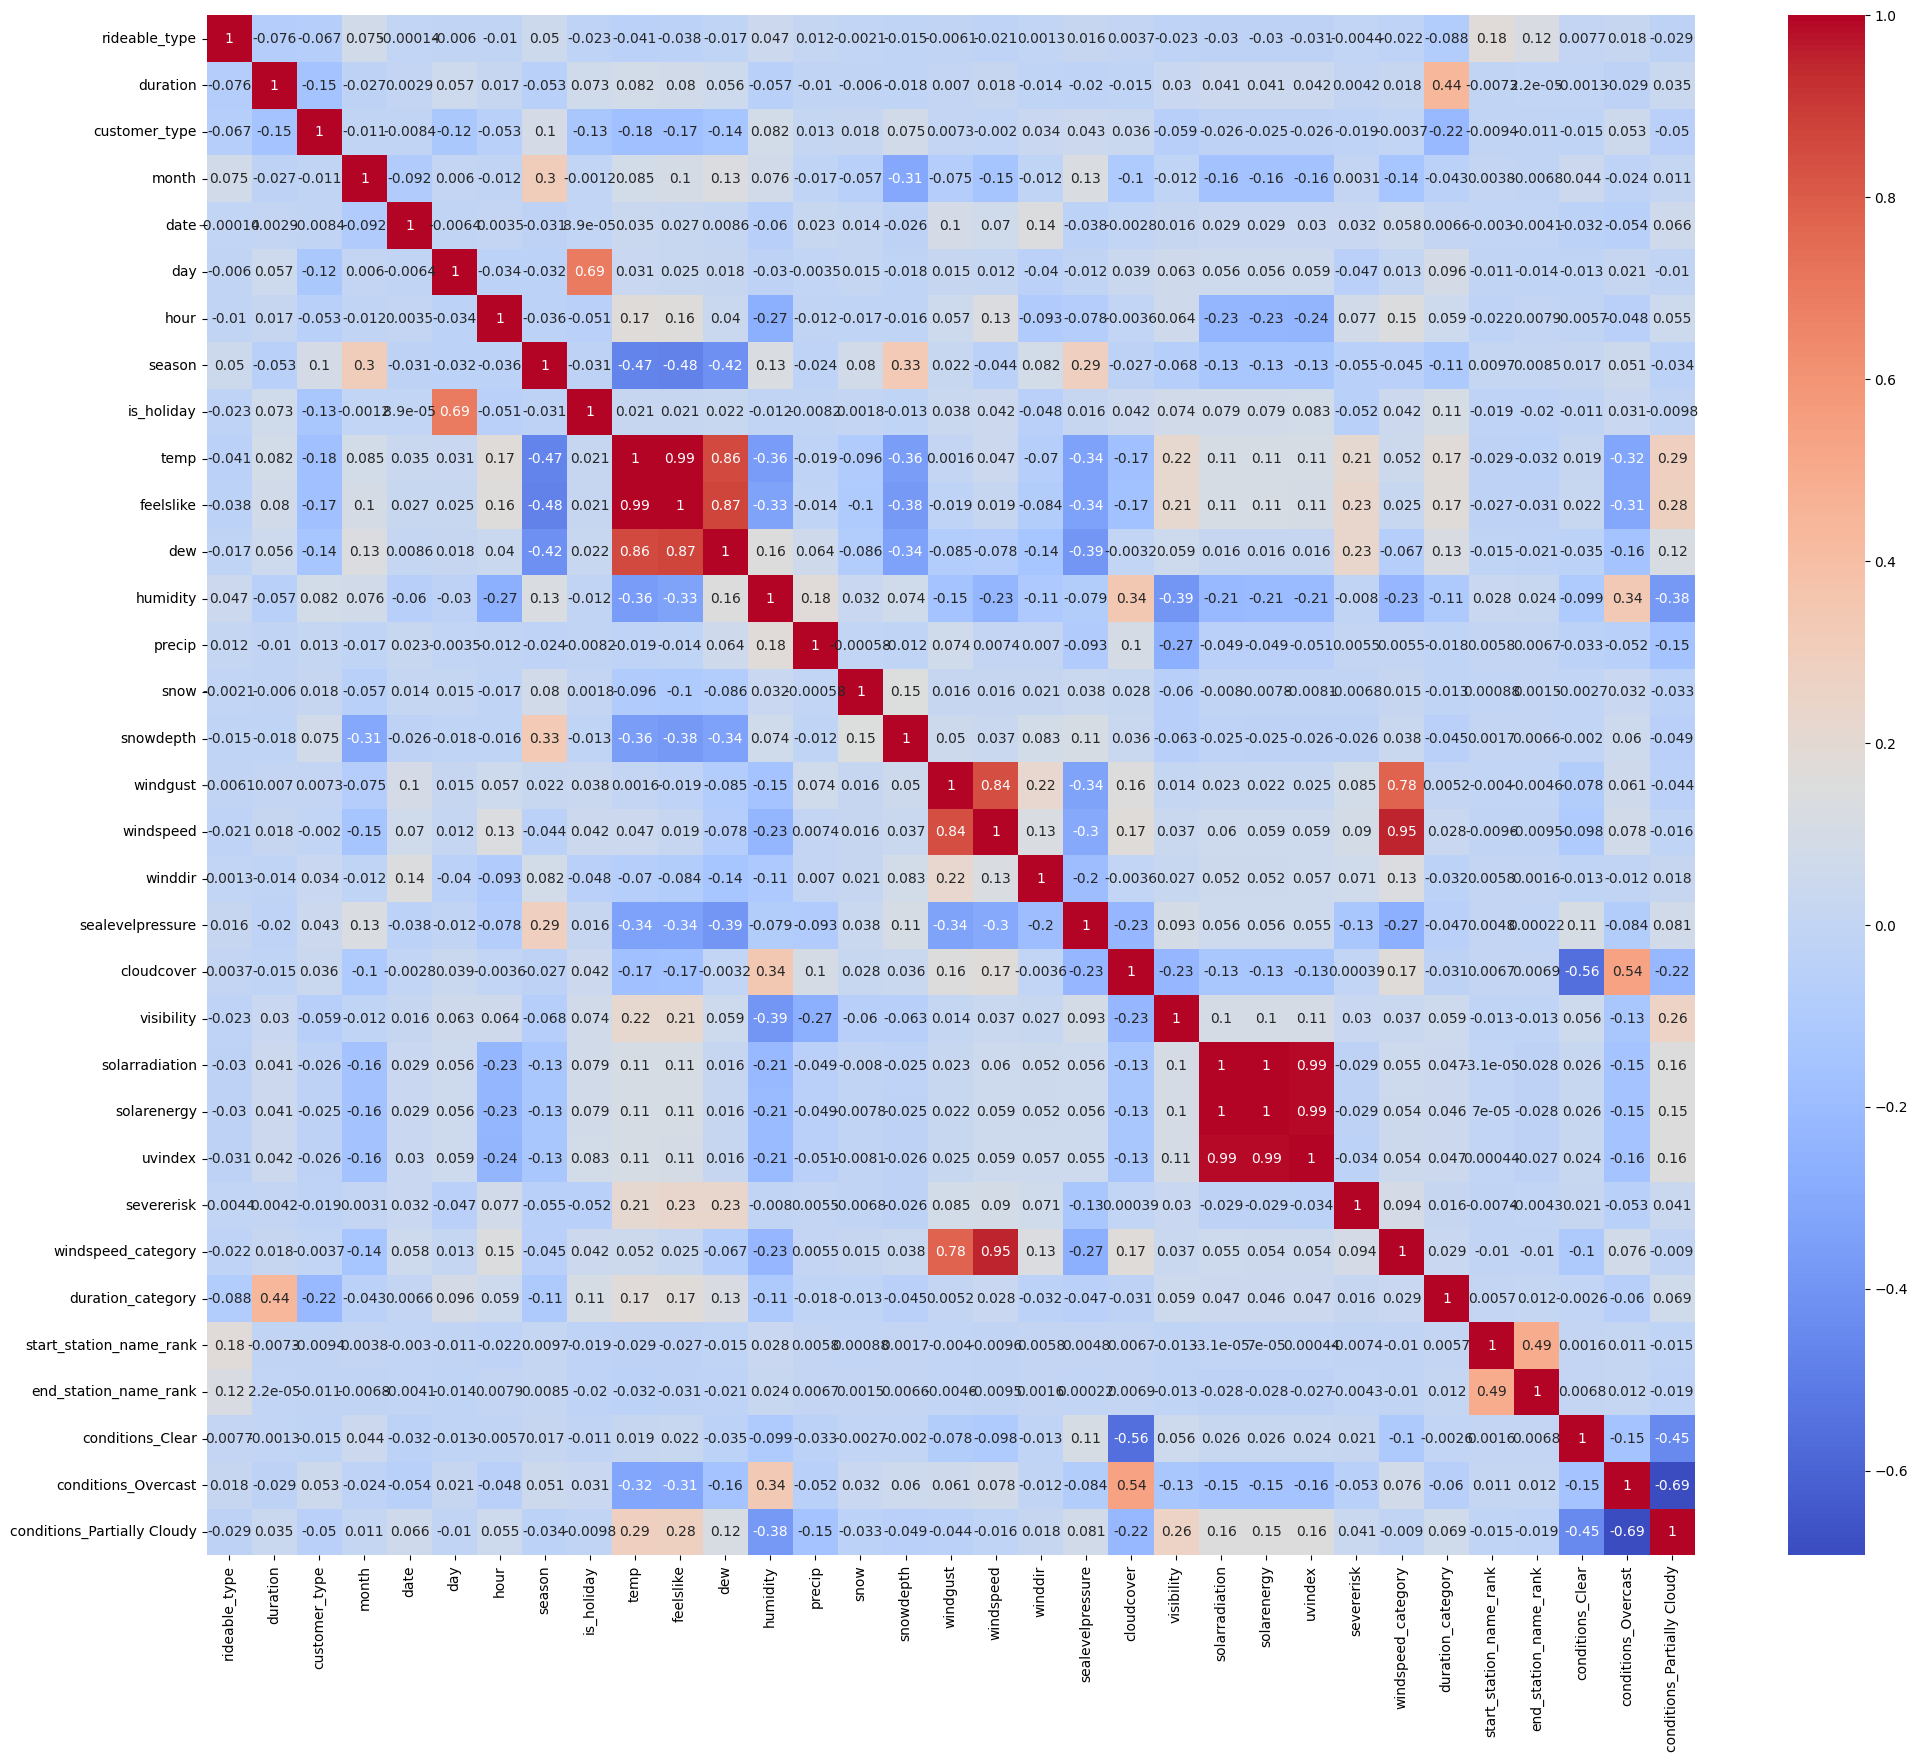

In [ ]:
# Create correlation matrix
correlation_matrix = clean_bike_new.corr(numeric_only=False)

# Size of correlation matrix
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the correlation matrix
plt.show()

From our correlation matrix, we've identified some variables that exhibit strong correlations with others. To avoid issues with multicollinearity, we'll drop these highly correlated variables from our dataset. The variables to be dropped are 'day', 'feelslike', 'dew', 'windspeed', 'uvindex', and 'solarradiation'.

In [ ]:
# Drop columns to avoid multicollinearity
clean_bike_new = clean_bike_new.drop(columns=['day','feelslike', 'dew',
                                              'windspeed', 'uvindex', 'solarradiation'])

After using corr matrix and drop some features, we will use an Ordinary Least Squares (OLS) regression model and perform backward elimination. This process involves iteratively removing the feature with the highest p-value (i.e., the least statistically significant) and refitting the model until all features have a p-value less than our chosen significance level (0.05).

In our case, 'customer_type' is the target variable, while all other columns in our dataset will serve as feature variables. We will also add a constant to our feature matrix to include an intercept term in our model.


### Backward Elimination

In [ ]:
# Define your independent variables (features) and dependent variable (target)
# In this case, 'customer_type' is the target, and all other columns are features
X = clean_bike_new.drop('customer_type', axis=1)
y = clean_bike_new['customer_type']

# Add a constant to the independent variables matrix. This is needed to include the intercept term in the regression equation.
X = sm.add_constant(X)

# Fit the Ordinary Least Squares (OLS) model
model = sm.OLS(y, X).fit()

# Run a loop for backward elimination
while True:
    # Find the maximum p-value
    max_p_value = max(model.pvalues)

    # If the maximum p-value is greater than 0.05 (significance level), remove the feature with the highest p-value
    if max_p_value > 0.05:
        # Get the name of the variable to be dropped
        dropped_variable = model.pvalues[model.pvalues == max_p_value].index[0]

        # Print the name of the variable that is being dropped
        print(f"Dropping variable: {dropped_variable}, p-value: {max_p_value}")

        # Drop the variable with the highest p-value
        X = X.drop(columns=[dropped_variable])

        # Fit the model again after dropping the variable
        model = sm.OLS(y, X).fit()
    else:
        # If all p-values are less than 0.05, exit the loop
        break

# Print the final summary of the model
print(model.summary())

Dropping variable: snow, p-value: 0.1863740216298488
                            OLS Regression Results                            
Dep. Variable:          customer_type   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                 2.134e+04
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        02:18:38   Log-Likelihood:            -3.4340e+06
No. Observations:             5225885   AIC:                         6.868e+06
Df Residuals:                 5225859   BIC:                         6.868e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

We have successfully fitted the OLS model and performed backward elimination, resulting in a model that only includes statistically significant features. The 'snow' feature will be drop due to its high p-value.

Looking at the summary of our final model, we see that the R-squared value is 0.093, which means that our model explains about 9.3% of the variance in our dependent variable, 'customer_type'. Additionally, the p-values for all remaining features are less than 0.05, indicating that they are all statistically significant at the 5% significance level.


In [ ]:
# Drop columns based on p-value
clean_bike_new = clean_bike_new.drop(columns=['snow'])

### Feature Importance

Our next step is to evaluate the importance of each feature in predicting the target variable, 'customer_type'. Understanding feature importance can help us interpret our model by identifying which features have the most influence on our predictions.

To do this, we'll use a RandomForestClassifie and scale our data using StandardScaler to ensure that all features have a similar scale. This is an important step because machine learning algorithms like RandomForest can be sensitive to the scale of the features.

In [ ]:
# Define your independent variables (features) and dependent variable (target)
X = clean_bike_new.drop('customer_type', axis=1)
y = clean_bike_new['customer_type']

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training and 20% testing

# Initialize a scaler
scaler = StandardScaler()

# Fit on the training set
scaler.fit(X_train)

# Scale the training set and test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)

# Fit the model to the data
rf.fit(X_train, y_train)

# Get the importance of each feature
importances = rf.feature_importances_

Feature: rideable_type, Importance: 0.06298069224341686
Feature: duration, Importance: 0.2866156118217499
Feature: month, Importance: 0.038961793682441785
Feature: date, Importance: 0.001409517779416754
Feature: hour, Importance: 0.061428128071539835
Feature: season, Importance: 0.040606977350263584
Feature: is_holiday, Importance: 0.08902907120683455
Feature: temp, Importance: 0.10846324578719684
Feature: humidity, Importance: 0.007783579999374714
Feature: precip, Importance: 0.0005217785087794093
Feature: snowdepth, Importance: 0.014674674925241864
Feature: windgust, Importance: 0.0015227870948638892
Feature: winddir, Importance: 0.0025027052602263353
Feature: sealevelpressure, Importance: 0.0040417080171147755
Feature: cloudcover, Importance: 0.0054629893672385665
Feature: visibility, Importance: 0.0019166028257361627
Feature: solarenergy, Importance: 0.010776994571041192
Feature: severerisk, Importance: 0.0002837713761904268
Feature: windspeed_category, Importance: 0.00062151123581

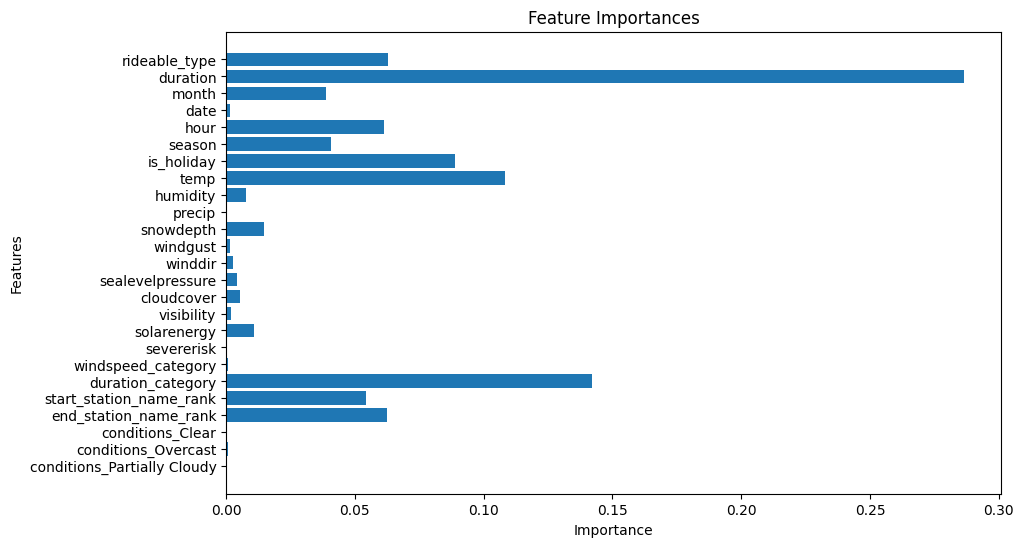

In [ ]:
# Get feature names from the original DataFrame
feature_names = X.columns
# Display the feature importances
for feature, importance in zip(feature_names, importances):
    print(f'Feature: {feature}, Importance: {importance}')

# Plot the importances in a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, align='center')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

We have successfully trained our RandomForestClassifier and used it to quantify the importance of each feature in predicting 'customer_type'. The output shows the importance score of each feature, with higher values indicating greater importance. We got some features that need to drop from our model, but before to that, we need to validate our RandomForestClassifier.


### Validate Feature Importance

To validate the performance of our RandomForestClassifier, we'll use a technique called cross-validation. This method provides a robust estimate of the model's performance by partitioning the original sample into a training set to train the model, and a test set to evaluate it.

In our case, we'll use 5-fold cross-validation, which splits the data into 5 subsets of approximately equal size. The model is then trained 5 times, each time using 4 of the subsets for training and the remaining subset for testing. The output will be 5 accuracy scores, one for each of the 5 iterations of training and testing the model.

We'll then calculate the mean of these 5 accuracy scores to get an overall measure of how well our model performs on average.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)

# Perform cross validation
scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')  # 5-fold cross validation

# Output the scores
print("Accuracy scores for each fold: ", scores)
print("Mean accuracy score: ", scores.mean())

Accuracy scores for each fold:  [0.66682964 0.66647946 0.66707936 0.66664689 0.66696454]
Mean accuracy score:  0.6667999774200923


We've successfully completed the cross-validation of our RandomForestClassifier. The accuracy scores for each of the 5 folds were approximately 0.67, indicating that RandomForestClassifier is not overfitting the data when computing feature importances.

After validating the feature importance, we drop features that we don't use to our model.

In [ ]:
# List of columns to be dropped
columns_to_drop = [
    'date', 'precip', 'windgust', 'winddir', 'sealevelpressure', 'cloudcover',
    'visibility', 'severerisk','windspeed_category', 'conditions_Clear',
    'conditions_Overcast', 'conditions_Partially Cloudy'
]

# Drop the columns from the DataFrame
clean_bike_new = clean_bike_new.drop(columns=columns_to_drop)

## Train Classification Models
Now let's proceed to the model training phase. We're going to use a variety of machine learning models to fit the training data and then test their performance on the test data.

The models we'll be using are: Logistic Regression, k-Nearest Neighbors, Naive Bayes, Stochastic Gradient Descent, AdaBoost, Quadratic Discriminant Analysis, Decision Tree, Linear Discriminant Analysis, Gradient Boosting, Neural Network, XGBoost, LightGBM Classifer, and Catboost. For each model, we'll print its accuracy score, which tells us the proportion of correct predictions made out of the total number of predictions.

But first, we need to prepare our data. Split the data into train and test, and do normalization.

In [ ]:
# Define your independent variables (features) and dependent variable (target)
X = clean_bike_new.drop('customer_type', axis=1)
y = clean_bike_new['customer_type']

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training and 20% testing

# Initialize a scaler
scaler = StandardScaler()

# Fit on the training set
scaler.fit(X_train)

# Scale the training set and test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Create a list to store the models and their names
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('k-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Stochastic Gradient Descent', SGDClassifier(max_iter=1000, tol=1e-3, loss='log')),
    ('AdaBoost', AdaBoostClassifier()),
    ('Quadratic Discriminant Analysis', QuadraticDiscriminantAnalysis()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Linear Discriminant Analysis', LinearDiscriminantAnalysis()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Neural Network', MLPClassifier(max_iter=1000))
]

# Iterate through each model and train it
for name, model in models:
    print(f"Training model: {name}")
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Print evaluation metric (Accuracy)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\n")

Training model: Logistic Regression
Accuracy: 0.6506132454120211


Training model: k-Nearest Neighbors
Accuracy: 0.6385616981621295


Training model: Naive Bayes
Accuracy: 0.6380459960370348


Training model: Stochastic Gradient Descent


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.



Accuracy: 0.6513279568915121


Training model: AdaBoost
Accuracy: 0.6646376642425159


Training model: Quadratic Discriminant Analysis
Accuracy: 0.6484337102710833


Training model: Decision Tree
Accuracy: 0.6213617406429724


Training model: Linear Discriminant Analysis
Accuracy: 0.6489283633298475


Training model: Gradient Boosting
Accuracy: 0.6695928058118386


Training model: Neural Network
Accuracy: 0.6706175126318318




In [ ]:
# Create a list to store the models and their names
models = [
    ('XGBoost', XGBClassifier(eval_metric='mlogloss')),
    ('LightGBM Classifer', LGBMClassifier()),
    ('CatBoost', CatBoostClassifier(verbose=0))
]

# Iterate through each model and train it
for name, model in models:
    print(f"Training model: {name}")
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Print evaluation metric (Accuracy)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\n")

Training model: XGBoost
Accuracy: 0.6848093672172273


Training model: LightGBM Classifer
Accuracy: 0.677043218517055


Training model: CatBoost
Accuracy: 0.6866999560839935




## Hyperparameter Tuning

In our previous steps, we found that the CatBoost classifier provided one of the highest accuracy scores. To further improve the performance of the CatBoost classifier, we will now perform hyperparameter tuning. We will use the Randomized Search Cross Validation method, which allows us to define a grid of hyperparameters and randomly sample from the grid to find the best combination. The hyperparameters we'll be tuning include depth, learning_rate, iterations, l2_leaf_reg, bagging_temperature, and border_count. We'll perform 5-fold cross validation and use the best parameters for our model.

In [ ]:
# Define the parameters grid
param_grid = {
    'depth': [4, 6, 8, 10],
    'learning_rate' : [0.03, 0.1, 0.2, 0.3],
    'iterations': [500, 1000, 1500],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'bagging_temperature': [0, 1, 2, 3],
    'border_count': [128, 254]
}

# Create a base model
cb = CatBoostClassifier(task_type="GPU", one_hot_max_size=10, random_strength=0.1,
                        grow_policy="SymmetricTree", min_data_in_leaf=1, verbose=0)

# Instantiate the randomized search model
random_search = RandomizedSearchCV(estimator = cb, param_distributions = param_grid,
                                   cv = 5, n_jobs = 1, verbose = 0, n_iter = 10)

# Fit the randomized search to the data
random_search.fit(X_train, y_train)

# Print the best parameters
print(random_search.best_params_)

{'learning_rate': 0.2, 'l2_leaf_reg': 7, 'iterations': 1500, 'depth': 10, 'border_count': 254, 'bagging_temperature': 1}


We have now performed the hyperparameter tuning on the CatBoost classifier and found the optimal values for our hyperparameters. We can now proceed to use these hyperparameters to train our CatBoost model and make predictions on the test data, hoping that this would further improve the performance of our model.

In [ ]:
# Define the best model
best_model = CatBoostClassifier(task_type="GPU",
                                learning_rate=0.3,
                                l2_leaf_reg=9,
                                iterations=1500,
                                depth=10,
                                border_count=254,
                                bagging_temperature=0,
                                one_hot_max_size=10,
                                random_strength=0.1,
                                grow_policy="SymmetricTree",
                                min_data_in_leaf=1,
                                verbose=0)

# Fit the best model to the data
best_model.fit(X_train, y_train)

We have successfully trained our optimal CatBoost model on the training data. The accuracy score of the model on the test data gives us a measure of how well the model performs on new, unseen data. This score indicates how often the model correctly predicts the customer type.

We've also saved this model for future use. By saving the model, we can reload it later and use it to make predictions without needing to retrain it. This can be a significant time saver, particularly for more complex models that take a long time to train.

In [ ]:
# Predict the test data
y_pred = best_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6925496829723577


## Save Best Model
The trained model will be store as "best_model.cbm". We can load this model in the future to make predictions without having to retrain it, saving computational resources and time.

In [ ]:
# Save the model
best_model.save_model("best_model.cbm")

!mv "best_model.cbm" "/content/drive/MyDrive/Colab Notebooks"

# Execute

Here are the recommendations for Director or Decision Makers:

1. Focus on increasing bike availability at stations located on the outskirts of the city near the beach, as these stations are highly popular with both Casual and Member users. This will improve user experience.

2. Increase the availability of electric bikes for Casual users, as the analysis shows Casuals prefer electric bikes over classic bikes. This could attract more Casual users.

3. Do targeted promotions to Casual users to encourage use of the service during sunny and warm weather (24-28°C), as the analysis indicates increased usage by Casuals under such conditions.

4. Enhance service and bike availability during busy morning and evening rush hours to serve Members who tend to use bikes for commuting. This is key to retaining Members.

5. Provide special incentives or promotions to loyal Members who use the service year-round, even in poor weather or winter. This can retain devoted Members.  

6. Consider expansion to locations similar to current popular stations, such as city outskirts near beaches. This could attract new Casual and Member users.

7. Increase bike availability on weekends as the analysis shows increased Casual usage on Saturdays and Sundays.

8. Implement different marketing strategies for Casual and Member users based on their distinct usage patterns.